* To investigate the forcings on stratification and total currents of last five days.

In [1]:
import numpy as np
import netCDF4 as nc
from salishsea_tools import (nc_tools,viz_tools,tidetools,geo_tools,stormtools)
import datetime, os
from glob import glob
from IPython.core.display import Image,display
from nowcast import figures
import matplotlib.pyplot as plt
import pytz 
import StraTimeSeries as sts
import seaborn as sns
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
%matplotlib inline

In [2]:
sites = {'Sandheads': {'lat': 49.10,'lon': -123.30,'j' : 46,'i' : 53},
    'Steveston':{
        'j': 44, ##424
        'i': 72, ##312
    },
    'VENUS East':{'lat': 49.0419, 'lon': -123.3176,'depth': 170, 'j': 36, 'i': 43},    
    'VENUS Central':{ 'lat': 49.0401,'lon': -123.4261, 'depth': 300, 'j': 44, 'i': 26 },
    'Point on transect':{'j':36,'i':20},
    'mouth':{ 'j':39,'i':74},
    'near field':{'j':43,'i':64},
    'estuary':{'j':36,'i':102},
    'middle':{'j':38,'i':66},
    'north':{'j':46,'i':70},}

In [3]:
grid6 = nc.Dataset('/ocean/jieliu/research/meopar/river-treatment/bathy_meter_SalishSea6.nc')
X = grid6.variables['nav_lon'][:, :]
Y = grid6.variables['nav_lat'][:, :]
bathy = grid6.variables['Bathymetry'][:, :]

* Load model result from different river flow conditions

* Only river

In [4]:
river_T_oct = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014OnlyRiver/oct2014onlyriver_T.nc')
river_U_oct = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014OnlyRiver/oct2014onlyriver_U.nc')
river_V_oct = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014OnlyRiver/oct2014onlyriver_V.nc')

river_T_may = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015OnlyRiver/may2015onlyriver_T.nc')
river_U_may = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015OnlyRiver/may2015onlyriver_U.nc')
river_V_may = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015OnlyRiver/may2015onlyriver_V.nc')

river_T_jan = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016OnlyRiver/jan2016onlyriver_T.nc')
river_U_jan = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016OnlyRiver/jan2016onlyriver_U.nc')
river_V_jan = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016OnlyRiver/jan2016onlyriver_V.nc')

* No tides

In [5]:
notide_T_oct = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014notides/oct2014notides_T.nc')
notide_U_oct = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014notides/oct2014notides_U.nc')
notide_V_oct = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014notides/oct2014notides_V.nc')

notide_T_may = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015notides/may2015notides_T.nc')
notide_U_may = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015notides/may2015notides_U.nc')
notide_V_may = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015notides/may2015notides_V.nc')

notide_T_jan = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016notides/jan2016notides_T.nc')
notide_U_jan = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016notides/jan2016notides_U.nc')
notide_V_jan = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016notides/jan2016notides_V.nc')

* No winds

In [6]:
nowind_T_oct = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014nowind/oct2014nowind_T.nc')
nowind_U_oct = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014nowind/oct2014nowind_U.nc')
nowind_V_oct = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014nowind/oct2014nowind_V.nc')

nowind_T_may = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015nowind/may2015nowind_T.nc')
nowind_U_may = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015nowind/may2015nowind_U.nc')
nowind_V_may = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015nowind/may2015nowind_V.nc')

nowind_T_jan = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016nowind/jan2016nowind_T.nc')
nowind_U_jan = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016nowind/jan2016nowind_U.nc')
nowind_V_jan = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016nowind/jan2016nowind_V.nc')

* No f

In [7]:
nof_T_oct = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014nof/oct2014nof_T.nc')
nof_U_oct = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014nof/oct2014nof_U.nc')
nof_V_oct = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014nof/oct2014nof_V.nc')

nof_T_may = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015nof/may2015nof_T.nc')
nof_U_may = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015nof/may2015nof_U.nc')
nof_V_may = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015nof/may2015nof_V.nc')

nof_T_jan = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016nof/jan2016nof_T.nc')
nof_U_jan = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016nof/jan2016nof_U.nc')
nof_V_jan = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016nof/jan2016nof_V.nc')

 * Combine all forcings

In [8]:
all_T_oct = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014combineall/oct2014all_T.nc')
all_U_oct = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014combineall/oct2014all_U.nc')
all_V_oct = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014combineall/oct2014all_V.nc')

all_T_may = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015combineall/may2015all_T.nc')
all_U_may = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015combineall/may2015all_U.nc')
all_V_may = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015combineall/may2015all_V.nc')

all_T_jan = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016combineall/jan2016all_T.nc')
all_U_jan = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016combineall/jan2016all_U.nc')
all_V_jan = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016combineall/jan2016all_V.nc')

# Stratification and horizontal currents

* Mouth

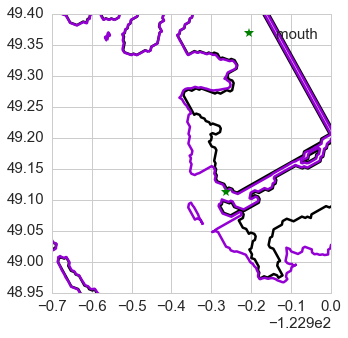

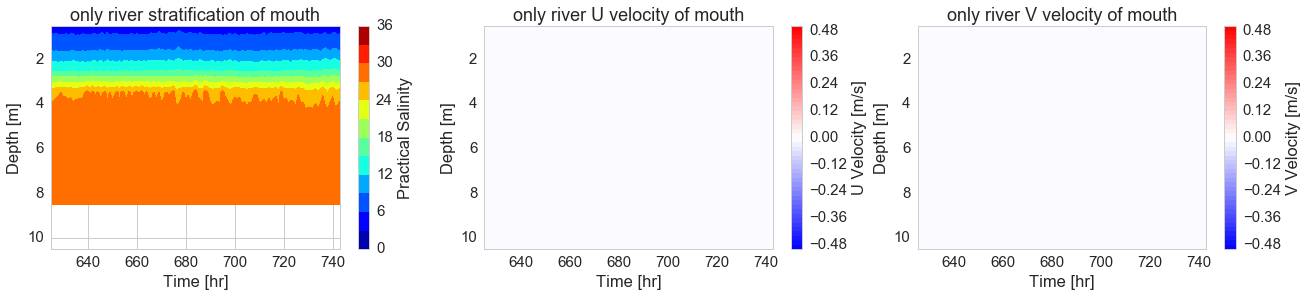

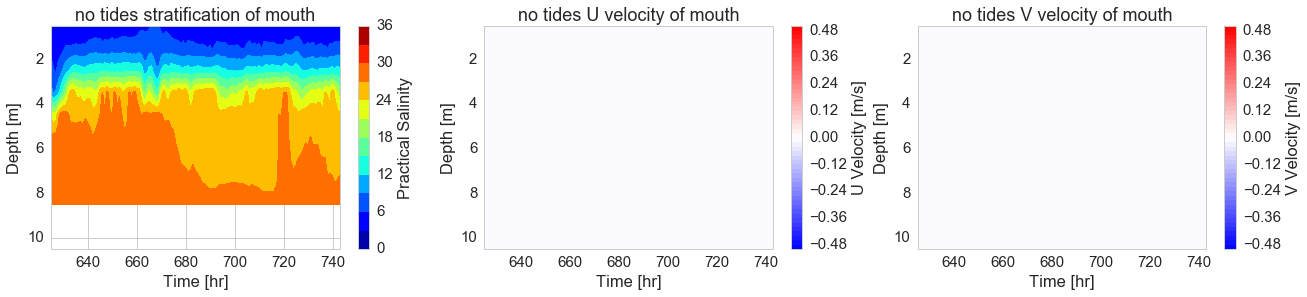

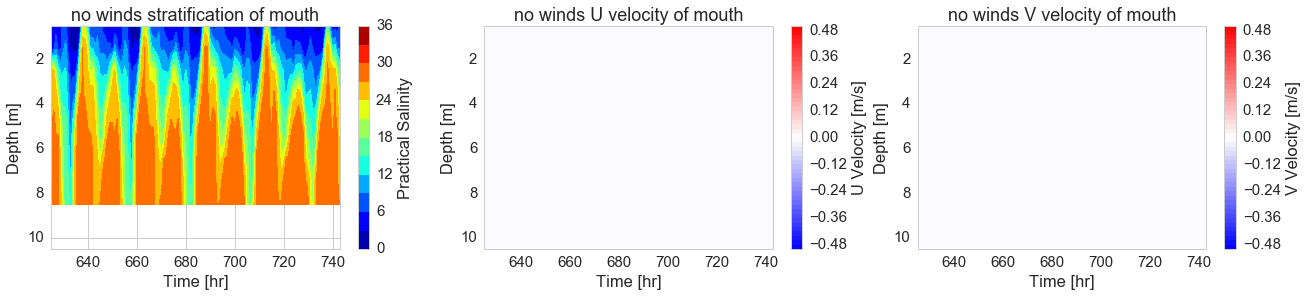

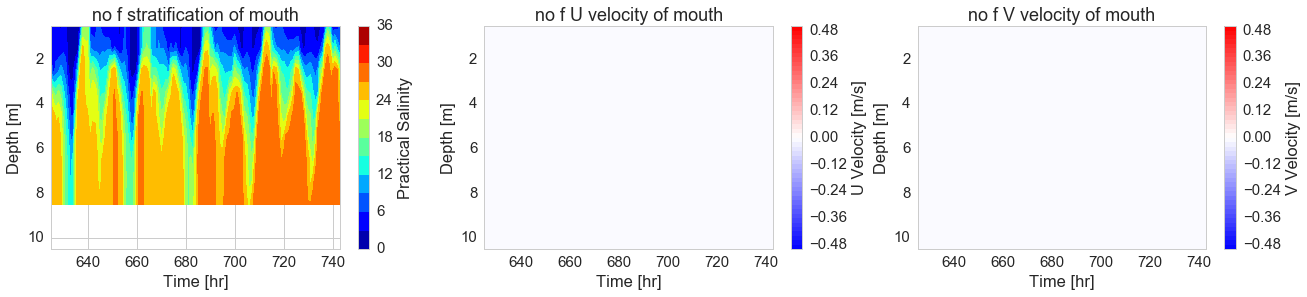

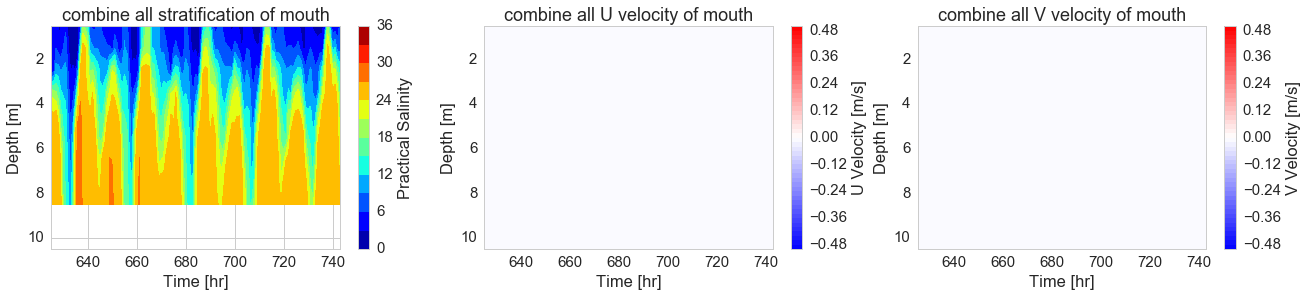

In [9]:
sts.plot_stn('mouth')
fig = sts.plot_stratification_current('mouth',10,'only river',river_T_oct,river_U_oct,river_V_oct,625,743)
fig = sts.plot_stratification_current('mouth',10,'no tides',notide_T_oct,notide_U_oct,notide_V_oct,625,743)
fig = sts.plot_stratification_current('mouth',10,'no winds',nowind_T_oct,nowind_U_oct,nowind_V_oct,625,743)
fig = sts.plot_stratification_current('mouth',10,'no f',nof_T_oct,nof_U_oct,nof_V_jan,625,743)
fig = sts.plot_stratification_current('mouth',10,'combine all',all_T_oct,all_U_oct,all_V_oct,625,743)

* North (around Steveston)

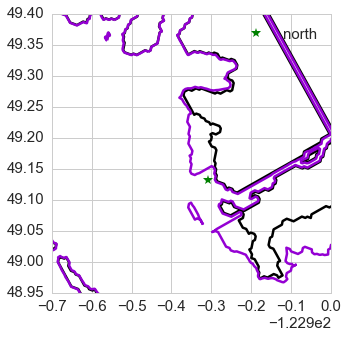

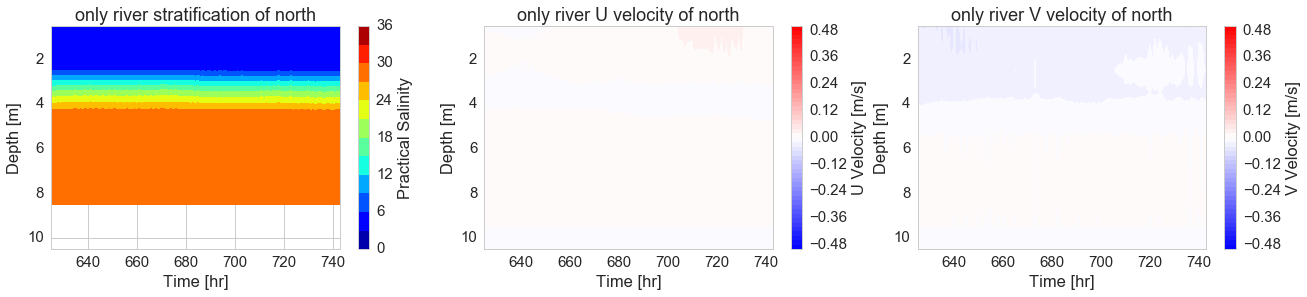

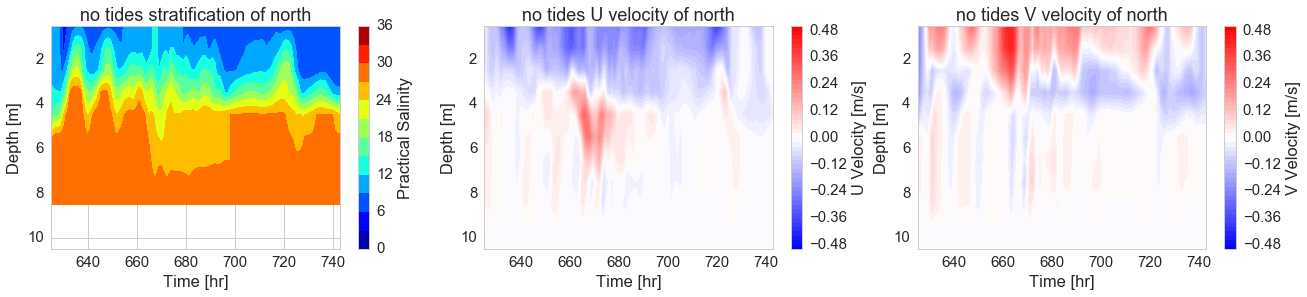

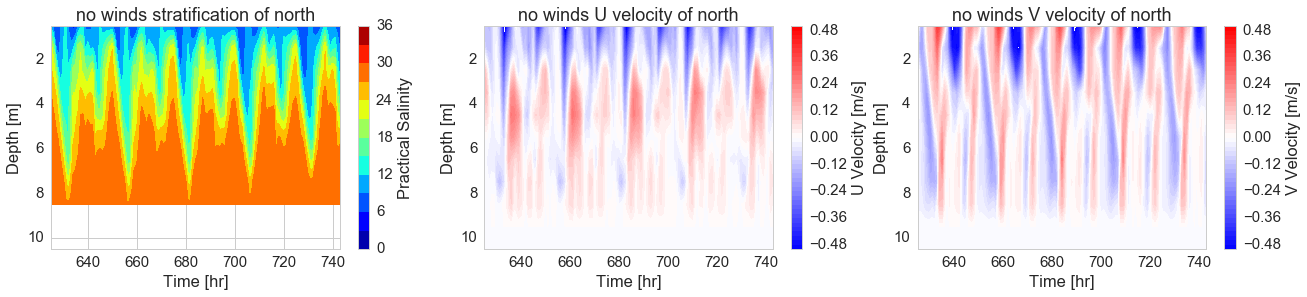

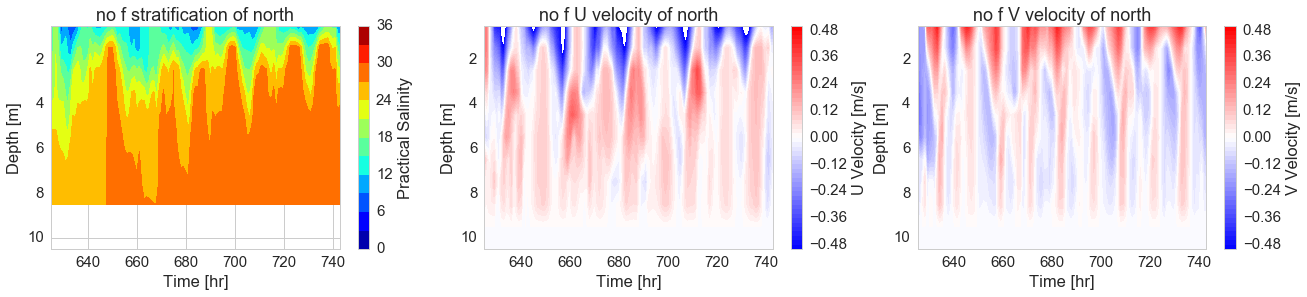

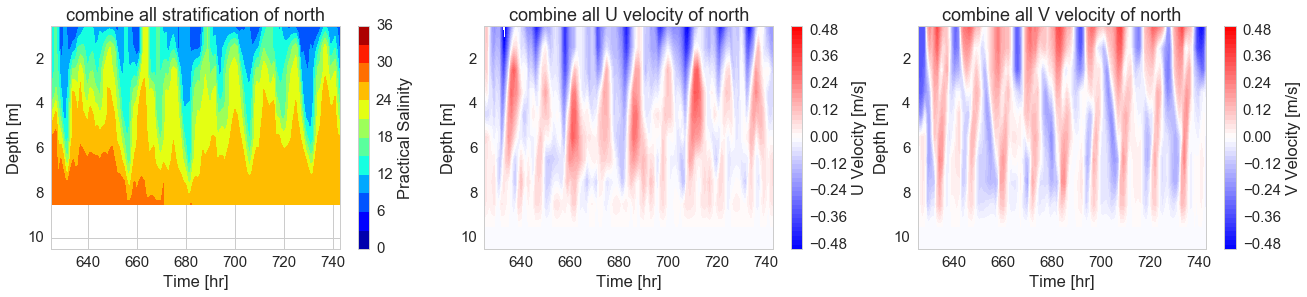

In [10]:
sts.plot_stn('north')
fig = sts.plot_stratification_current('north',10,'only river',river_T,river_U,river_V,625,743)
fig = sts.plot_stratification_current('north',10,'no tides',notide_T,notide_U,notide_V,625,743)
fig = sts.plot_stratification_current('north',10,'no winds',nowind_T,nowind_U,nowind_V,625,743)
fig = sts.plot_stratification_current('north',10,'no f',nof_T,nof_U,nof_V,625,743)
fig = sts.plot_stratification_current('north',10,'combine all',all_T,all_U,all_V,625,743)

* Froud number is estimated roughly 1 here, indicating it can be considered as liftoff or mouth for my case.

* Steveston

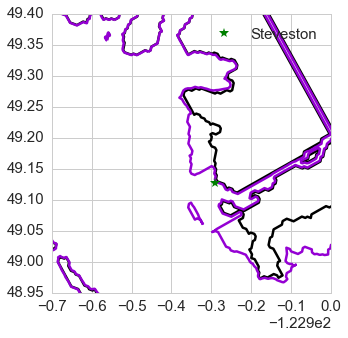

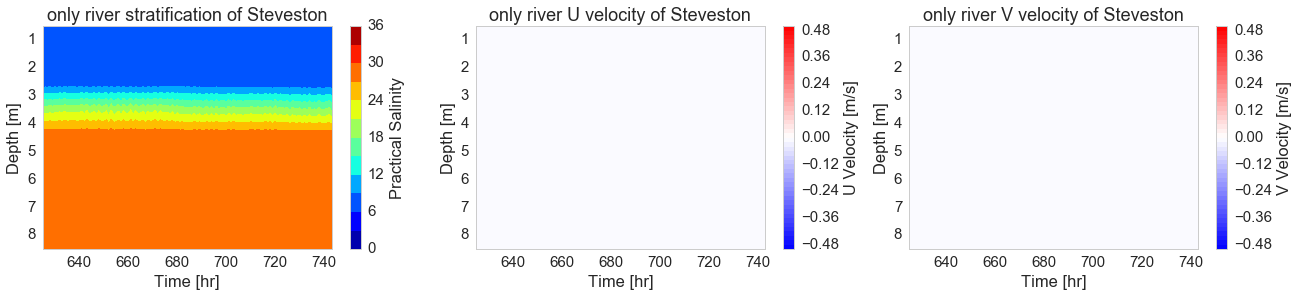

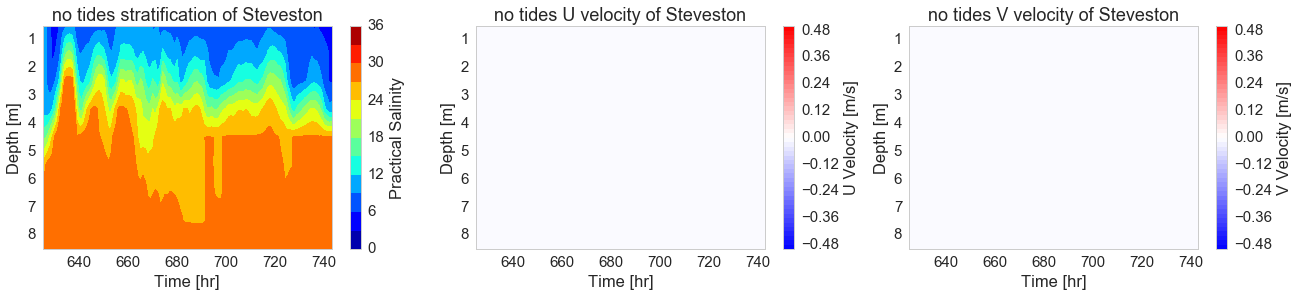

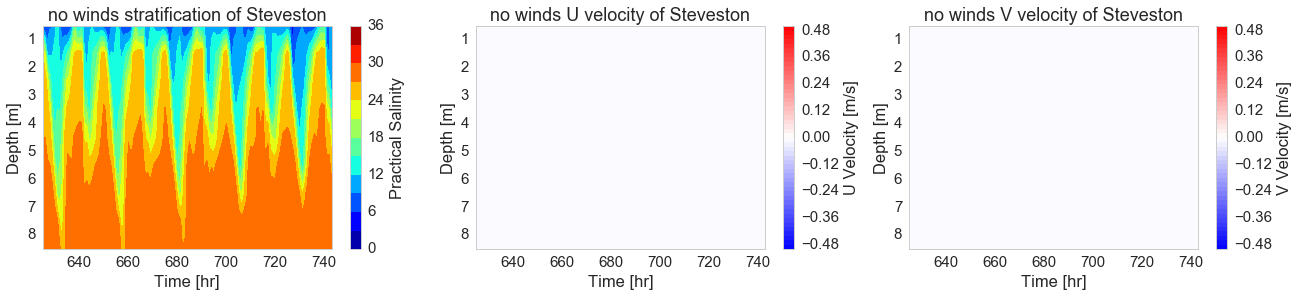

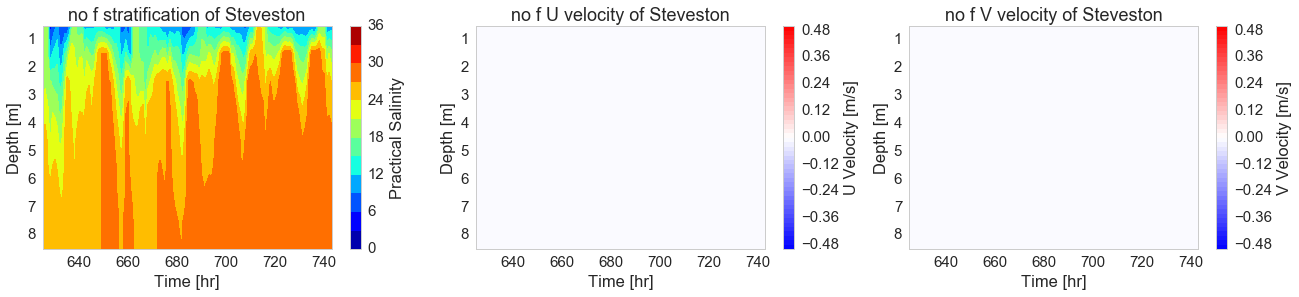

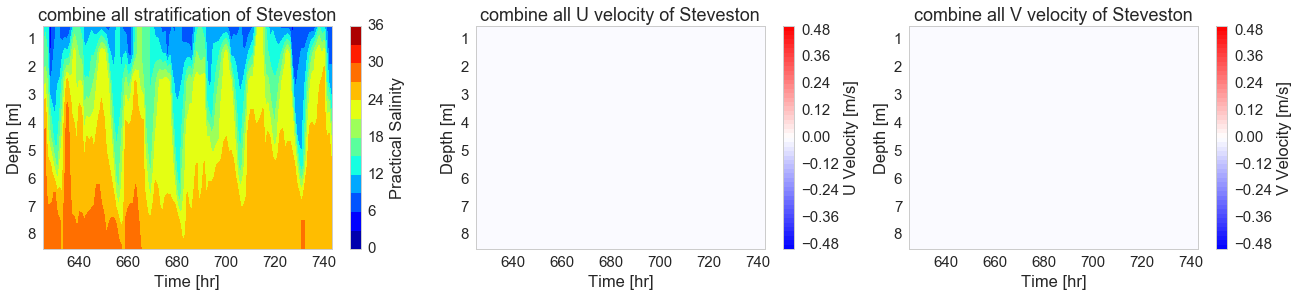

In [13]:
sts.plot_stn('Steveston')
fig = sts.plot_stratification_current('Steveston',8,'only river',river_T,river_U,river_V,625,743)
fig = sts.plot_stratification_current('Steveston',8,'no tides',notide_T,notide_U,notide_V,625,743)
fig = sts.plot_stratification_current('Steveston',8,'no winds',nowind_T,nowind_U,nowind_V,625,743)
fig = sts.plot_stratification_current('Steveston',8,'no f',nof_T,nof_U,nof_V,625,743)
fig = sts.plot_stratification_current('Steveston',8,'combine all',all_T,all_U,all_V,625,743)

* near field

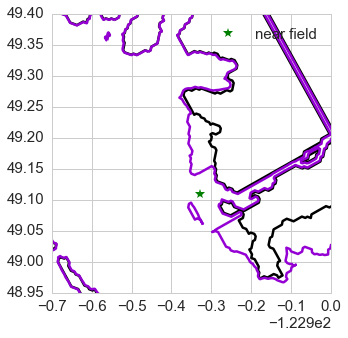

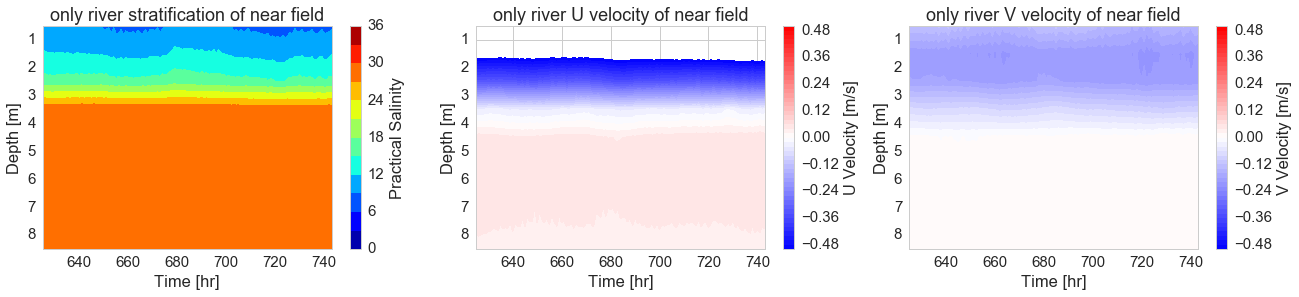

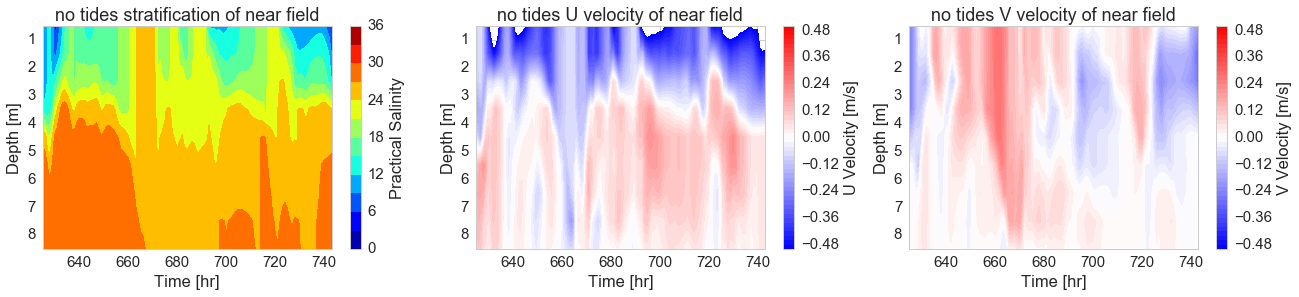

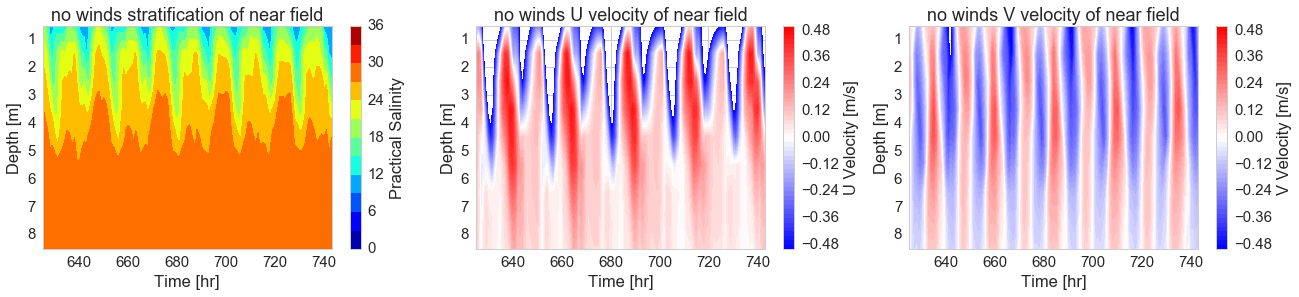

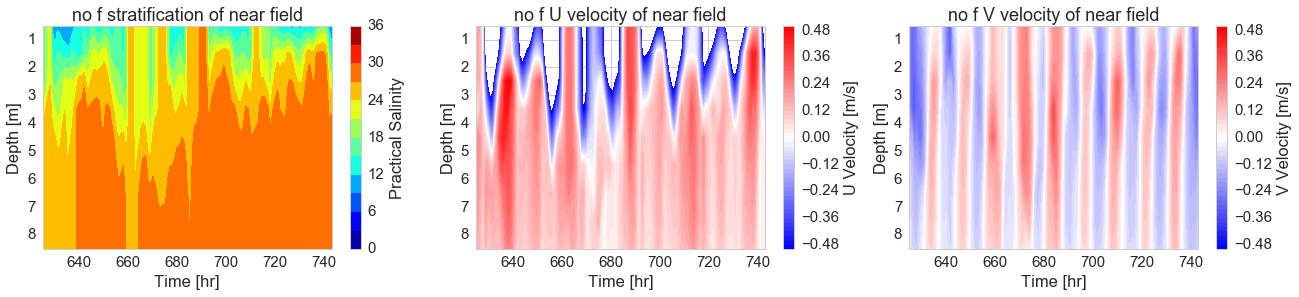

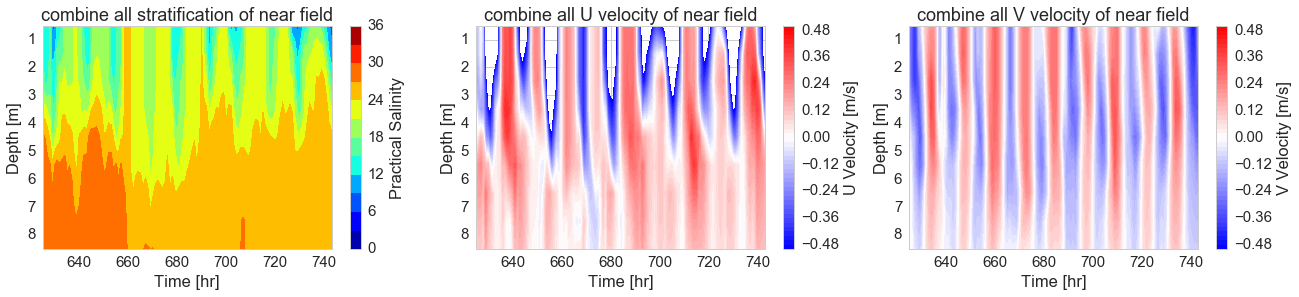

In [14]:
sts.plot_stn('near field')
fig = sts.plot_stratification_current('near field',8,'only river',river_T,river_U,river_V,625,743)
fig = sts.plot_stratification_current('near field',8,'no tides',notide_T,notide_U,notide_V,625,743)
fig = sts.plot_stratification_current('near field',8,'no winds',nowind_T,nowind_U,nowind_V,625,743)
fig = sts.plot_stratification_current('near field',8,'no f',nof_T,nof_U,nof_V,625,743)
fig = sts.plot_stratification_current('near field',8,'combine all',all_T,all_U,all_V,625,743)

* Sandheads

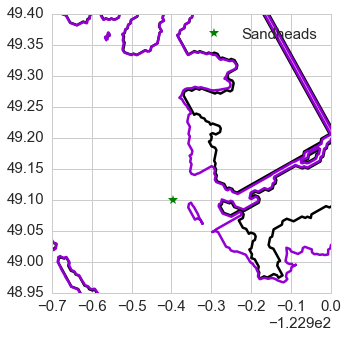

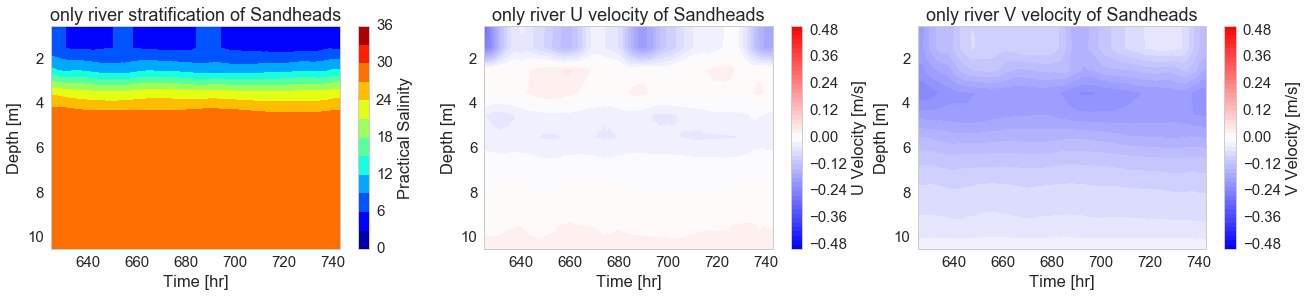

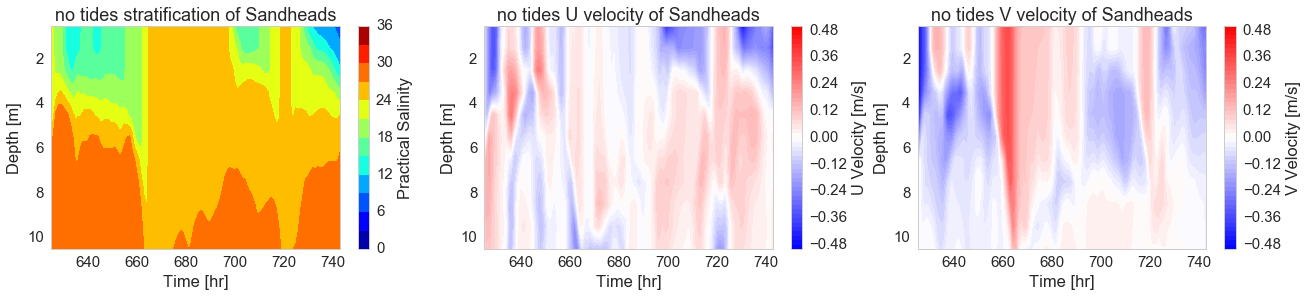

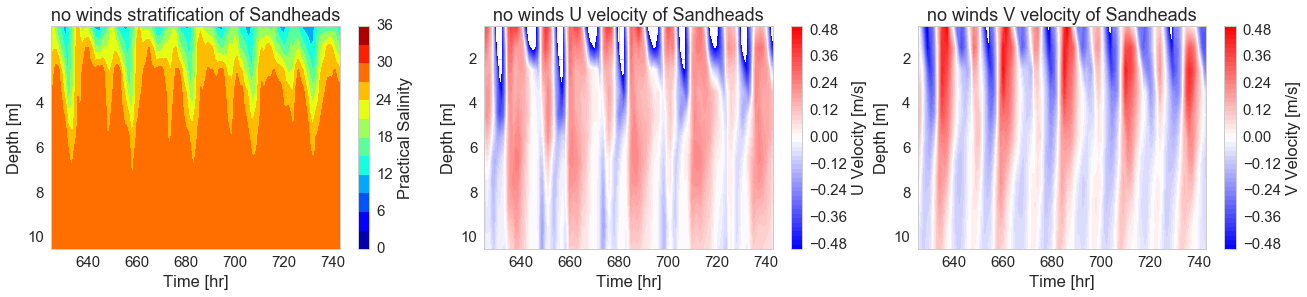

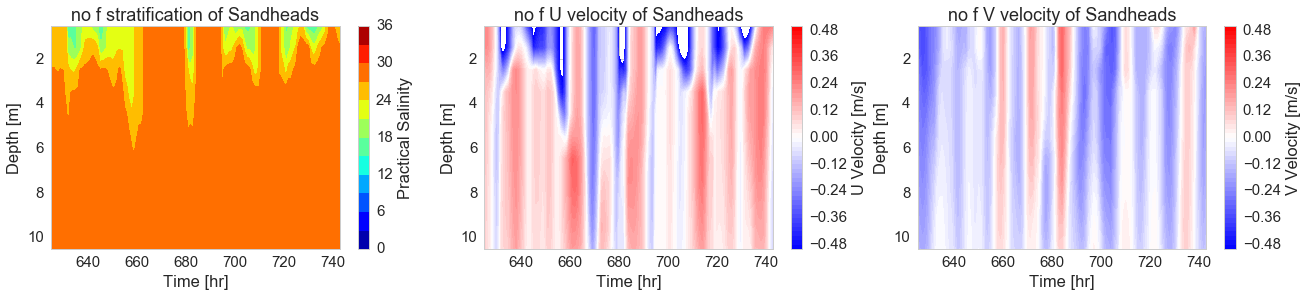

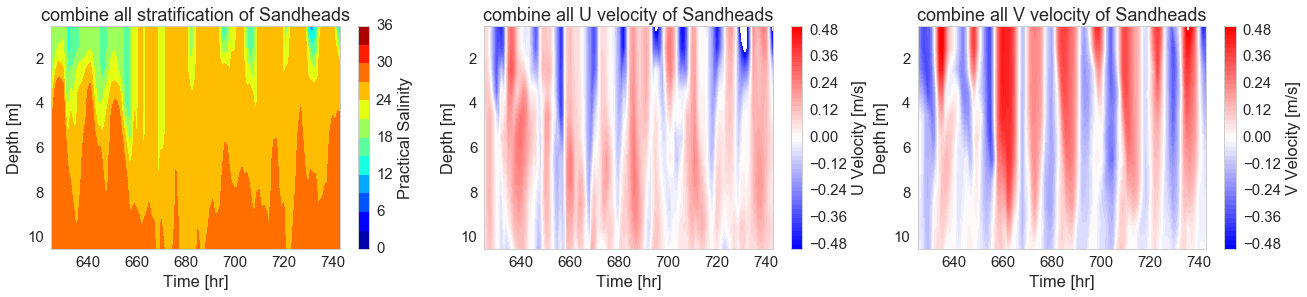

In [15]:
sts.plot_stn('Sandheads')
fig = sts.plot_stratification_current('Sandheads',10,'only river',river_T,river_U,river_V,625,743)
fig = sts.plot_stratification_current('Sandheads',10,'no tides',notide_T,notide_U,notide_V,625,743)
fig = sts.plot_stratification_current('Sandheads',10,'no winds',nowind_T,nowind_U,nowind_V,625,743)
fig = sts.plot_stratification_current('Sandheads',10,'no f',nof_T,nof_U,nof_V,625,743)
fig = sts.plot_stratification_current('Sandheads',10,'combine all',all_T,all_U,all_V,625,743)

# Richardson number calculation

In [11]:
def calculate_density(t, s):
    """Caluclates the density given temperature in deg C (t)
    and salinity in psu (s).

    returns the density as an array (rho)
    """

    rho = (
        999.842594 + 6.793952e-2 * t
        - 9.095290e-3 * t*t + 1.001685e-4 * t*t*t
        - 1.120083e-6 * t*t*t*t + 6.536332e-9 * t*t*t*t*t
        + 8.24493e-1 * s - 4.0899e-3 * t*s
        + 7.6438e-5 * t*t*s - 8.2467e-7 * t*t*t*s
        + 5.3875e-9 * t*t*t*t*s - 5.72466e-3 * s**1.5
        + 1.0227e-4 * t*s**1.5 - 1.6546e-6 * t*t*s**1.5
        + 4.8314e-4 * s*s
        )

    return rho

In [12]:
def calculate_buoyancy_frequency(temp, sal, e3, depth_axis=1):
    """ Calculate the squared buoyancy frequency (n2) given temperature and
    salinity profiles. N2 is set to  g*drho/dz/rho. Note that NEMO uses a 
    defintion based on an equation of state:   
    g* (alpha dk[T] + beta dk[S] ) / e3w

    temp and sal are the temperature and salinity arrays
    e3 is an array of the vertical scale factors (grid spacing). Use e3w for
    constistency with NEMO.
    depth_axis defines the axis which corresponds to depth in the temp/sal
    arrays

    returns n2, an array of square buoyancy frequency at each point in temp/sal.
    """

    # acceleration due to gravity
    g = 9.80665
    rho0=1035 #NEMO fvalue in kg/m^3
    # First calculate density.
    rho = calculate_density(temp, sal)

    # Density gradient
    drho = np.zeros(rho.shape)
    # roll depth axis in rho and drho to first axis
    # assume e3 already has depth axis in first axis
    drho_r = np.rollaxis(drho, depth_axis)
    rho_r = np.rollaxis(rho, depth_axis)
    for k in np.arange(1, drho.shape[depth_axis]):
        drho_r[k, ...] = 1/e3[k, ...]*(rho_r[k, ...] - rho_r[k-1, ...])
    # Unroll drho
    drho = np.rollaxis(drho_r, 0, depth_axis+1)
    rho = np.rollaxis(rho_r, 0, depth_axis+1)
    # Define N2
    n2 = g*drho/rho0  # no negative because depth increases with increasking k

    return n2

In [14]:
def Richardson_value(n2,dep_ind,gridU,gridV,j,i,tst,ted,e3):
    """This function was made to calculate the 
    averaged Richardson number value over time at 
    a specific location at the depth between river
    plume water and ambient water
    definition of Ri number = N2/S2"""
    u = gridU.variables['vozocrtx']
    v = gridV.variables['vomecrty']
    ## unstagger
    UU,VV = viz_tools.unstagger(u[tst:ted+1,:,j:j+2,i:i+2],v[tst:ted+1,:,j:j+2,i:i+2])
    #rotate
    theta = np.pi*29/180
    UU = UU*np.cos(theta) - VV*np.sin(theta)
    VV = UU*np.sin(theta) +VV*np.cos(theta)
    S2 = np.zeros([UU.shape[0],UU.shape[1],UU.shape[2],UU.shape[3]])
    ## vertical shear
    for k in np.arange(1,UU.shape[1]):
        S2[:,k,...] = (1/e3[k,...]*(UU[:,k,...]-UU[:,k-1,...]))**2+\
                       (1/e3[k,...]*(VV[:,k,...]-VV[:,k-1,...]))**2 
    Ri_reverse = n2/S2[:,:,0,0]
    ##average over time at specific depth
    Ri_final = np.nanmean(Ri_reverse, axis = 0)
    return Ri_final

In [24]:
e3t = mesh.variables['e3t'][0,:,428,292]

In [16]:
import seaborn as sns
sns.set_palette("husl")

In [18]:
#rho = calculate_density(temp, sal)
#rho = np.ma.masked_less(rho, 0)
j = 46
i = 53
tst = 625
ten = 743
mesh = nc.Dataset('/data/jieliu/MEOPAR/river-treatment/oct8_101e061e05/mesh_mask.nc')
dep = river_T.variables['deptht']
e3w = mesh.variables['e3w'][0,:,j+380,i+240]
temp = river_T.variables['votemper'][tst:ten+1,:,j,i]
sal = river_T.variables['vosaline'][tst:ten+1,:,j,i]

temp_notides = notide_T.variables['votemper'][tst:ten+1,:,j,i]
sal_notides = notide_T.variables['vosaline'][tst:ten+1,:,j,i]

temp_nowinds= nowind_T.variables['votemper'][tst:ten+1,:,j,i]
sal_nowinds= nowind_T.variables['vosaline'][tst:ten+1,:,j,i]

temp_nof = nof_T.variables['votemper'][tst:ten+1,:,j,i]
sal_nof = nof_T.variables['vosaline'][tst:ten+1,:,j,i]

temp_all = all_T.variables['votemper'][tst:ten+1,:,j,i]
sal_all = all_T.variables['vosaline'][tst:ten+1,:,j,i]

n2_onlyriver = calculate_buoyancy_frequency(temp, sal, e3w)
n2_onlyriver = np.ma.masked_less(n2_onlyriver, 0)

n2_notide = calculate_buoyancy_frequency(temp_notides, sal_notides, e3w)
n2_notide = np.ma.masked_less(n2_notide, 0)

n2_nowind = calculate_buoyancy_frequency(temp_nowinds, sal_nowinds, e3w)
n2_nowind = np.ma.masked_less(n2_nowind, 0)

n2_nof = calculate_buoyancy_frequency(temp_nof, sal_nof, e3w)
n2_nof = np.ma.masked_less(n2_nof, 0)

n2_all = calculate_buoyancy_frequency(temp_all, sal_all, e3w)
n2_all = np.ma.masked_less(n2_all, 0)

(0, 20)

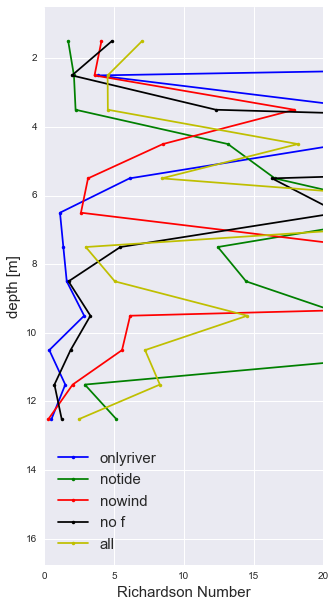

In [19]:
j =46
i = 53
## Sandheads far field
Ri_or = Richardson_value(n2_onlyriver,10,river_U,river_V,j,i,tst,ten,e3w)
Ri_notide=Richardson_value(n2_notide,4,notide_U,notide_V,j,i,tst,ten,e3w)
Ri_nowind = Richardson_value(n2_nowind,10,nowind_U,nowind_V,j,i,tst,ten,e3w)
Ri_nof = Richardson_value(n2_nof,10,nof_U,nof_V,j,i,tst,ten,e3w)
Ri_all = Richardson_value(n2_all,10,all_U,all_V,j,i,tst,ten,e3w)
fig, ax = plt.subplots(1,1,figsize = (5,10))
import seaborn as sns

ax.plot(Ri_or,dep,'b.-',label = 'onlyriver')
ax.plot(Ri_notide,dep,'g.-',label = 'notide')
ax.plot(Ri_nowind,dep,'r.-',label = 'nowind')
ax.plot(Ri_nof,dep,'k.-',label = 'no f')
ax.plot(Ri_all,dep,'y.-',label = 'all')
ax.set_ylim([dep[16],dep[0]])
ax.legend(loc = 'best',fontsize = 15)
ax.set_xlabel('Richardson Number',fontsize = 15)
ax.set_ylabel('depth [m]',fontsize = 15)
ax.set_xlim([0,20])

In [23]:
Ri_or

masked_array(data = [-- 144.6401567625519 3.8153816169192796 23.89549993265858
 21.36473759440125 6.097037443520396 1.1149098951530094 1.3545969481244444
 1.5977273645738597 2.8479030535772023 0.3468226555854639
 1.4918209442811934 0.500784977376247 -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- --],
             mask = [ True False False False False False False False False False False False
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True],
       fill_value = 1e+20)

(0, 10)

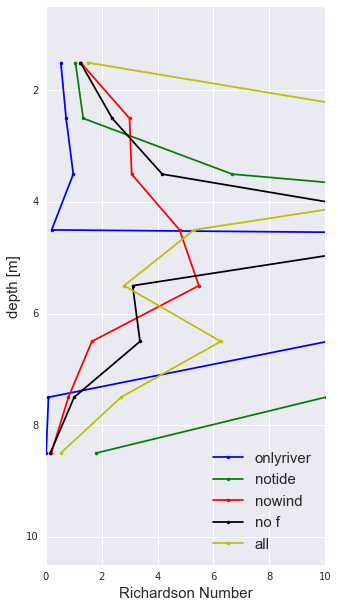

In [22]:
## near field
j =43
i = 64

Ri_or = Richardson_value(n2_onlyriver,10,river_U,river_V,j,i,tst,ten,e3w)
Ri_notide=Richardson_value(n2_notide,4,notide_U,notide_V,j,i,tst,ten,e3w)
Ri_nowind = Richardson_value(n2_nowind,10,nowind_U,nowind_V,j,i,tst,ten,e3w)
Ri_nof = Richardson_value(n2_nof,10,nof_U,nof_V,j,i,tst,ten,e3w)
Ri_all = Richardson_value(n2_all,10,all_U,all_V,j,i,tst,ten,e3w)
fig, ax = plt.subplots(1,1,figsize = (5,10))

ax.plot(Ri_or,dep,'b.-',label = 'onlyriver')
ax.plot(Ri_notide,dep,'g.-',label = 'notide')
ax.plot(Ri_nowind,dep,'r.-',label = 'nowind')
ax.plot(Ri_nof,dep,'k.-',label = 'no f')
ax.plot(Ri_all,dep,'y.-',label = 'all')
ax.set_ylim([dep[10],dep[0]])
ax.legend(loc = 'best',fontsize = 15)
ax.set_xlabel('Richardson Number',fontsize = 15)
ax.set_ylabel('depth [m]',fontsize = 15)
ax.set_xlim([0,10])

In [74]:
a = Richardson_value(n2,4,notide_U,notide_V,48,52,625,743,e3w)
a.shape

(40,)

In [63]:
a = Richardson_value(n2,10,nowind_U,nowind_V,48,52,625,743,e3w)
a

0.66663286579725012

In [68]:
a = Richardson_value(n2,10,nof_U,nof_V,48,52,625,743,e3w)
a

0.83840134146072243

In [69]:
a = Richardson_value(n2,10,all_U,all_V,48,52,625,743,e3w)
a

0.67246155456344825

In [12]:
def plot_stratification_current(stn, dep_ind,ty,grid_T,grid_U,grid_V,time_ind,time_last,\
                                smin = 0,smax = 36,umin = -0.5,umax = 0.5):
    """This function is made to plot the 
    stratification and horizontal current of a specific station """
    S = grid_T.variables['vosaline']
    t = grid_T.variables['time_counter']
    dep_T = grid_T.variables['deptht']
    U = grid_U.variables['vozocrtx']
    dep_U = grid_U.variables['depthu']
    V = grid_V.variables['vomecrty']
    dep_V = grid_V.variables['depthv']
    S_stn = S[:,:,sites[stn]['j'],sites[stn]['i']]
    ## tmask
    mesh = nc.Dataset('/data/jieliu/MEOPAR/river-treatment/oct8_101e061e05/mesh_mask.nc')
    tmask = mesh.variables['tmask'][0,:,sites[stn]['j']+380,sites[stn]['i']+240]
    np_mask = np.abs(1-tmask) 
    np_mask=np_mask +np.zeros(S_stn.shape) 
    S_stn = np.ma.masked_array(S_stn,mask=np_mask) ## mask sal=0 by tmask
    time_inds = np.arange(S.shape[0]) ## Define time
    fig, axs = plt.subplots(1,3,figsize = (22,4))
    ## stratification
    ax = axs[0]
    mesh = ax.contourf(time_inds, dep_T[:],np.transpose(S_stn[:]),np.arange(smin, smax+3, 3),cmap = 'jet')
    cbar=fig.colorbar(mesh,ax = ax)
    cbar.set_label('Practical Salinity')
    ax.set_title(ty+' stratification of '+stn)
    ## U current
    ax = axs[1]
    UU,VV = viz_tools.unstagger(U[:,:,sites[stn]['j']:sites[stn]['j']+2,sites[stn]['i']:sites[stn]['i']+2],\
                                V[:,:,sites[stn]['j']:sites[stn]['j']+2,sites[stn]['i']:sites[stn]['i']+2])
    #rotate
    theta = np.pi*29/180
    UU = UU*np.cos(theta) - VV*np.sin(theta)
    VV = UU*np.sin(theta) +VV*np.cos(theta)

    mesh = ax.contourf(time_inds, dep_U[:],np.transpose(UU[:,:,0,0]),np.arange(umin,umax+0.01,0.02),cmap = 'bwr')
    cbar=fig.colorbar(mesh,ax = ax)
    cbar.set_label('U Velocity [m/s]')
    ax.set_title(ty+' U velocity of '+stn)
    #print ('Max U', np.nanmax(UU[:,:,0,0]))
    #print ('Min U', np.nanmin(UU[:,:,0,0]))
    ## V current
    ax = axs[2]
    mesh = ax.contourf(time_inds, dep_V[:],np.transpose(VV[:,:,0,0]),np.arange(umin,umax+0.01,0.02),cmap = 'bwr')
    cbar=fig.colorbar(mesh,ax = ax)
    cbar.set_label('V Velocity [m/s]')
    ax.set_title(ty+' V velocity of '+stn)
    #print ('Max V', np.nanmax(VV[:,:,0,0]))
    #print ('Min V', np.nanmin(VV[:,:,0,0]))
    
    for ax, dep in zip(axs,[dep_T,dep_U,dep_V]):
        ax.set_ylim([dep[dep_ind], dep[0]])
        ax.set_xlim(time_inds[time_ind],time_inds[time_last])
        ax.set_xlabel('Time [hr]')
        ax.set_ylabel('Depth [m]')
    return fig

In [11]:
def plot_onlystra(stn, dep_ind,grid_T1,grid_T2, grid_T3,grid_T4,time_ind,\
                                smin = 0,smax = 36):
    S_stn = {}
    grid_Ts = [grid_T1,grid_T2, grid_T3,grid_T4]
    for grid_T,st in zip(grid_Ts,['onlyriver','nowind','notide','all']):
        S = grid_T.variables['vosaline']
        t = grid_T.variables['time_counter']
        dep_T = grid_T.variables['deptht']
        S_stn[st] = S[:,:,sites[stn]['j'],sites[stn]['i']]
        ## tmask
        mesh = nc.Dataset('/data/jieliu/MEOPAR/river-treatment/oct8_101e061e05/mesh_mask.nc')
        tmask = mesh.variables['tmask'][0,:,sites[stn]['j']+380,sites[stn]['i']+240]
        np_mask = np.abs(1-tmask) 
        np_mask=np_mask +np.zeros(S_stn[st].shape) 
        S_stn[st] = np.ma.masked_array(S_stn[st],mask=np_mask) ## mask sal=0 by tmask
        time_inds = np.arange(S.shape[0]) ## Define time
    fig, axs = plt.subplots(2,2,figsize = (18,14))
    ## stratification
    for ax, st in zip([axs[0,0],axs[0,1],axs[1,0],axs[1,1]],['onlyriver','nowind','notide','all']):
        mesh = ax.contourf(time_inds, dep_T[:],np.transpose(S_stn[st][:]),np.arange(smin, smax+3, 3),cmap = 'jet')
        cbar=fig.colorbar(mesh,ax = ax)
        cbar.set_label('Practical Salinity')
        #ax.set_title(st+' stratification of '+'south of Sandheads')
        ax.set_ylim([dep_T[dep_ind], dep_T[0]])
        ax.set_xlim(time_inds[time_ind],time_inds[-1])
        ax.set_xlabel('Time [hr]')
        ax.set_ylabel('Depth [m]')

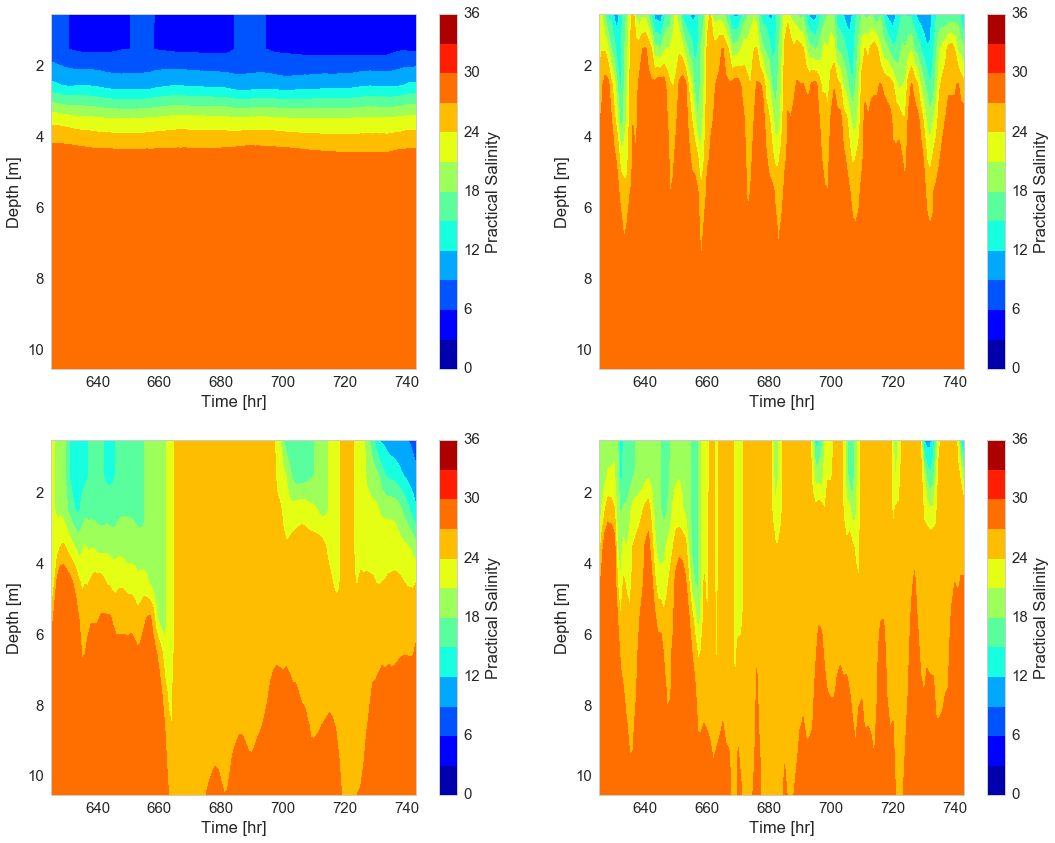

In [12]:
plot_onlystra('Sandheads',10,river_T_oct,nowind_T_oct,notide_T_oct,all_T_oct,625)

In [14]:
def plot_stra_allflows(stn,dep_ind,grid_T_oct,grid_T_may,grid_T_jan,start1,end1,start2,end2,start3,end3,\
                      smin = 0,smax = 36):
    """Plot the salinity stratification for different river flows and all cases"""
    S_stn_oct={};S_stn_may={};S_stn_jan={};
    
    for grid_Toct,grid_Tmay,grid_Tjan,st in zip(grid_T_oct,grid_T_may,grid_T_jan,['onlyriver','nowind','notide','all']):
        S1 = grid_Toct.variables['vosaline']
        S2 = grid_Tmay.variables['vosaline']
        S3 = grid_Tjan.variables['vosaline']
        t = grid_Toct.variables['time_counter']
        dep_T = grid_Toct.variables['deptht']
        S_stn_oct[st] = S1[:,:,sites[stn]['j'],sites[stn]['i']]
        S_stn_may[st] = S2[:,:,sites[stn]['j'],sites[stn]['i']]
        S_stn_jan[st] = S3[:,:,sites[stn]['j'],sites[stn]['i']]
        ## tmask
        mesh = nc.Dataset('/data/jieliu/MEOPAR/river-treatment/oct8_101e061e05/mesh_mask.nc')
        tmask = mesh.variables['tmask'][0,:,sites[stn]['j']+380,sites[stn]['i']+240]
        np_mask = np.abs(1-tmask) 
        np_mask=np_mask +np.zeros(S_stn_oct[st].shape) 
        S_stn_oct[st] = np.ma.masked_array(S_stn_oct[st],mask=np_mask) ## mask sal=0 by tmask
        S_stn_may[st] = np.ma.masked_array(S_stn_may[st],mask=np_mask)
        S_stn_jan[st] = np.ma.masked_array(S_stn_jan[st],mask=np_mask)
        time_inds = np.arange(S1.shape[0]) ## Define time
    fig, axs = plt.subplots(4,3,figsize = (19,22))
    
    for ax1 ,ax2, ax3, st in zip(axs[:,0], axs[:,1], axs[:,2], ['onlyriver','nowind','notide','all']):
        mesh1 = ax1.contourf(time_inds, dep_T[:],np.transpose(S_stn_oct[st][:]),np.arange(smin, smax+3, 3),cmap = 'jet')
        cbar=fig.colorbar(mesh1,ax = ax1)
        cbar.set_label('Practical Salinity')
        ax1.set_xlim(time_inds[start1],time_inds[end1])
        mesh2 = ax2.contourf(time_inds, dep_T[:],np.transpose(S_stn_may[st][:]),np.arange(smin, smax+3, 3),cmap = 'jet')
        cbar=fig.colorbar(mesh2,ax = ax2)
        cbar.set_label('Practical Salinity')
        ax2.set_xlim(time_inds[start2],time_inds[end2])
        mesh3 = ax3.contourf(time_inds, dep_T[:],np.transpose(S_stn_jan[st][:]),np.arange(smin, smax+3, 3),cmap = 'jet')
        cbar=fig.colorbar(mesh3,ax = ax3)
        cbar.set_label('Practical Salinity')
        ax3.set_xlim(time_inds[start3],time_inds[end3])
        
        for ax in [ax1,ax2,ax3]:
            ax.set_ylim([dep_T[dep_ind], dep_T[0]])
            ax.set_ylabel('Depth [m]')
    for ax in [axs[-1,0],axs[-1,1],axs[-1,2]]:
        ax.set_xlabel('Time [hour]')

In [18]:
ssh = {}
for gridT, st in zip([all_T_oct,all_T_may,all_T_jan],['oct','may','jan']):
    ssh[st] = gridT.variables['sossheig']

In [19]:
ssh['oct'].shape

(744, 130, 157)

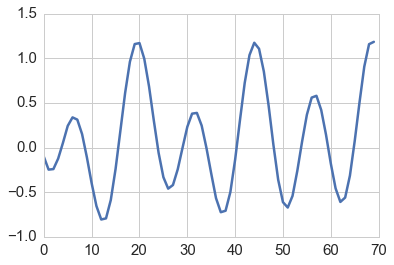

In [22]:
plt.plot(ssh['oct'][410:480,86,89])

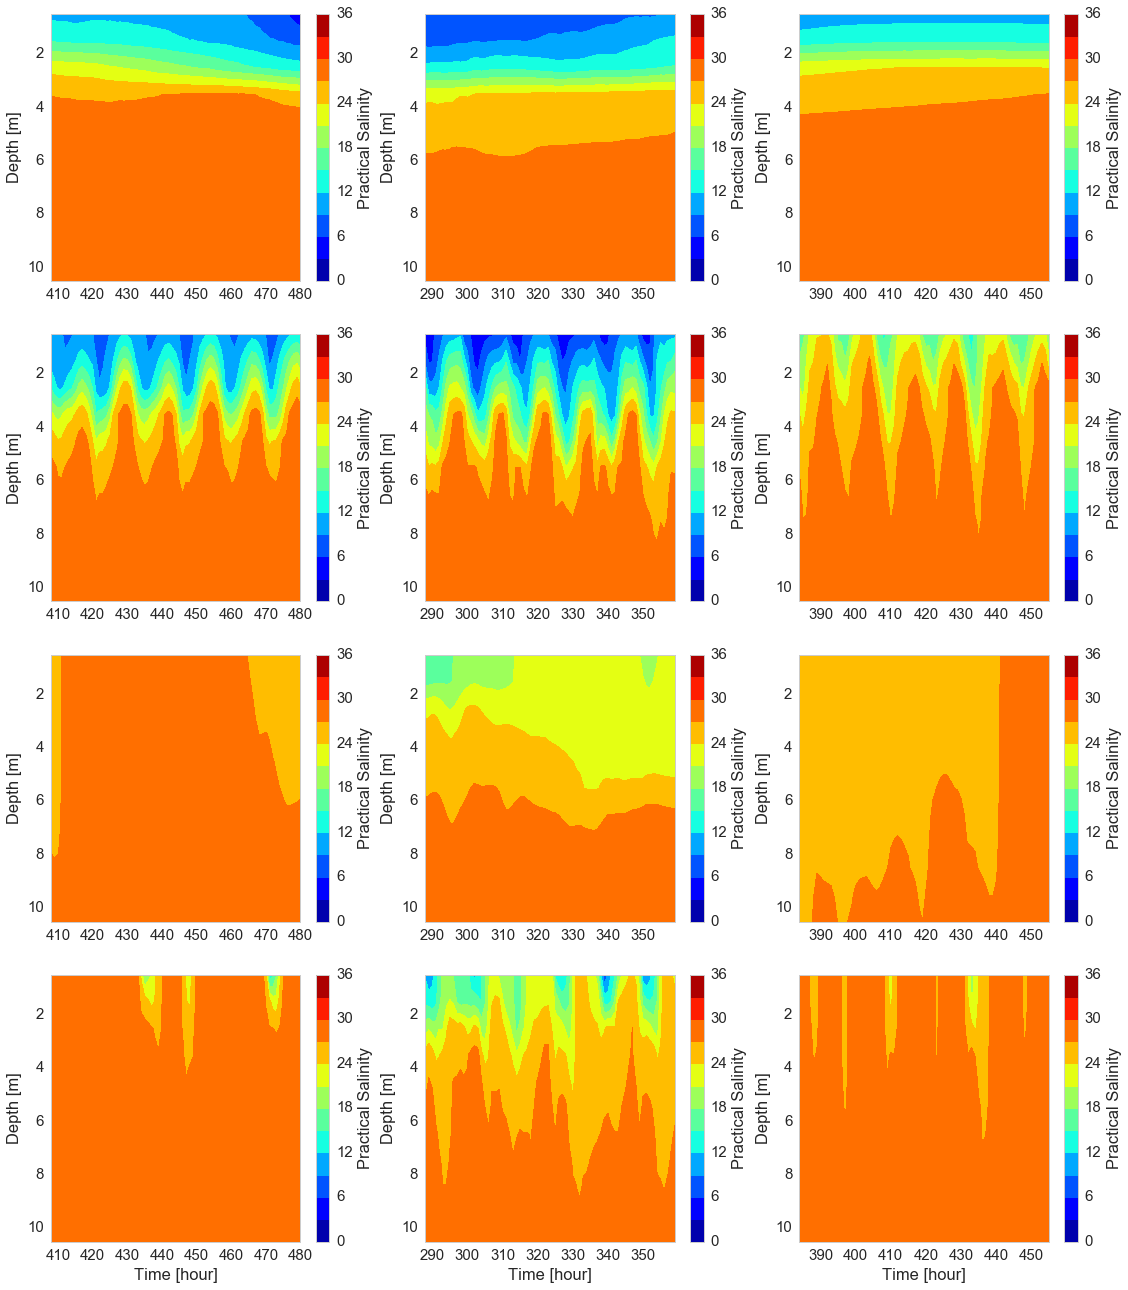

In [15]:
grid_T_oct = [river_T_oct,nowind_T_oct,notide_T_oct,all_T_oct]
grid_T_may = [river_T_may,nowind_T_may,notide_T_may,all_T_may]
grid_T_jan = [river_T_jan,nowind_T_jan,notide_T_jan,all_T_jan]
##moderate wind
plot_stra_allflows('Sandheads',10,grid_T_oct,grid_T_may,grid_T_jan,408,480,288,359,384,455)

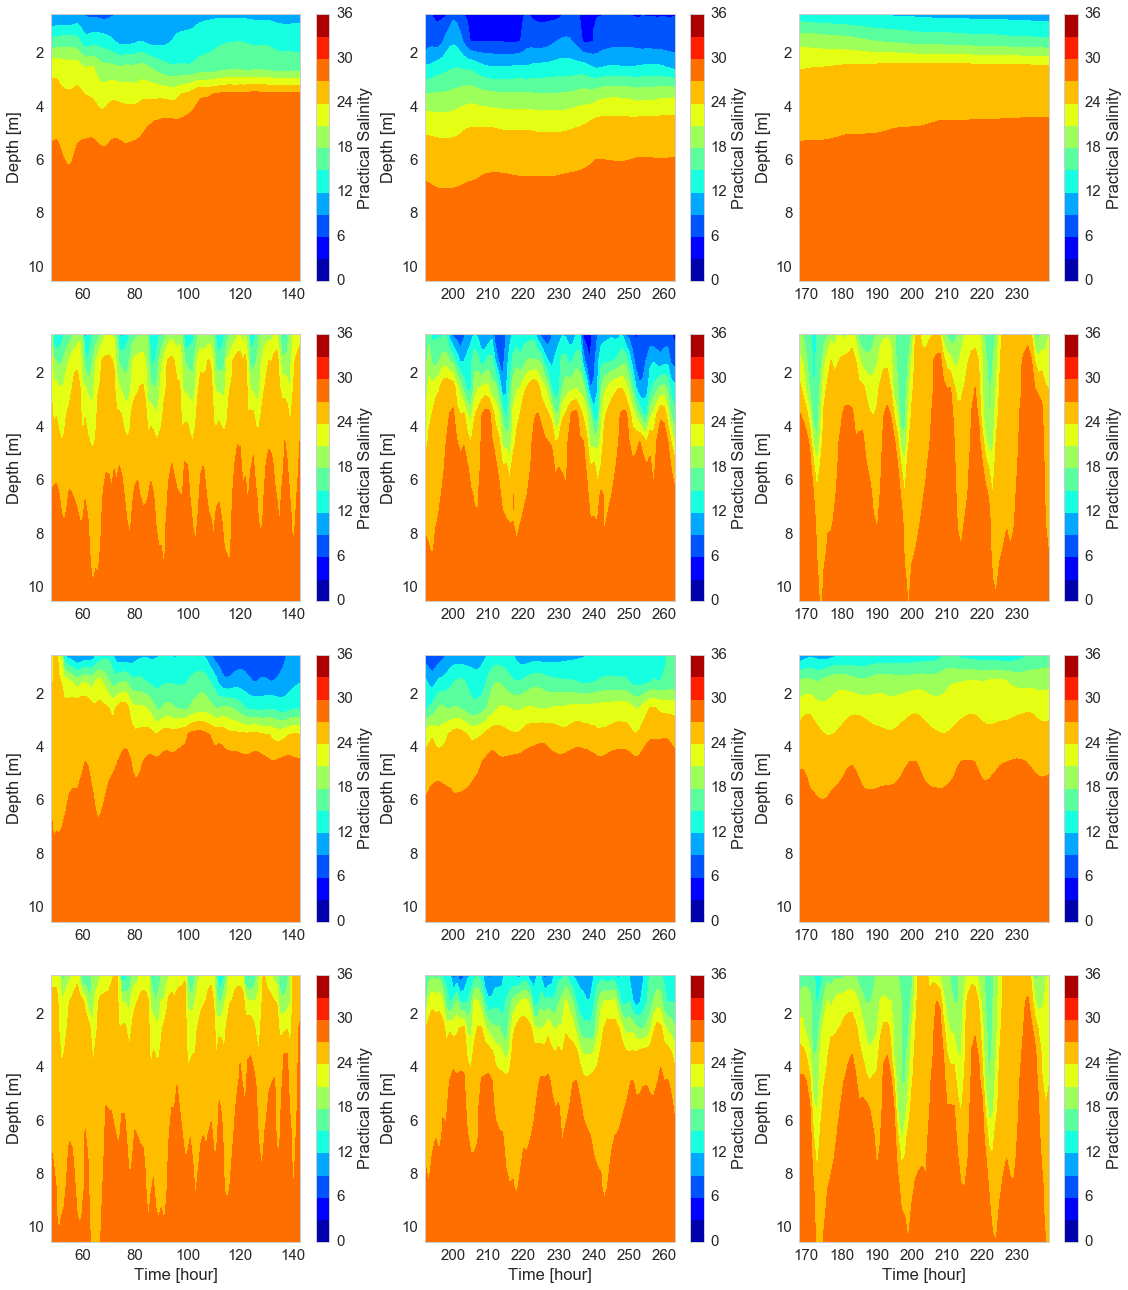

In [16]:
## weak wind
plot_stra_allflows('Sandheads',10,grid_T_oct,grid_T_may,grid_T_jan,48,143,192,263,168,239)

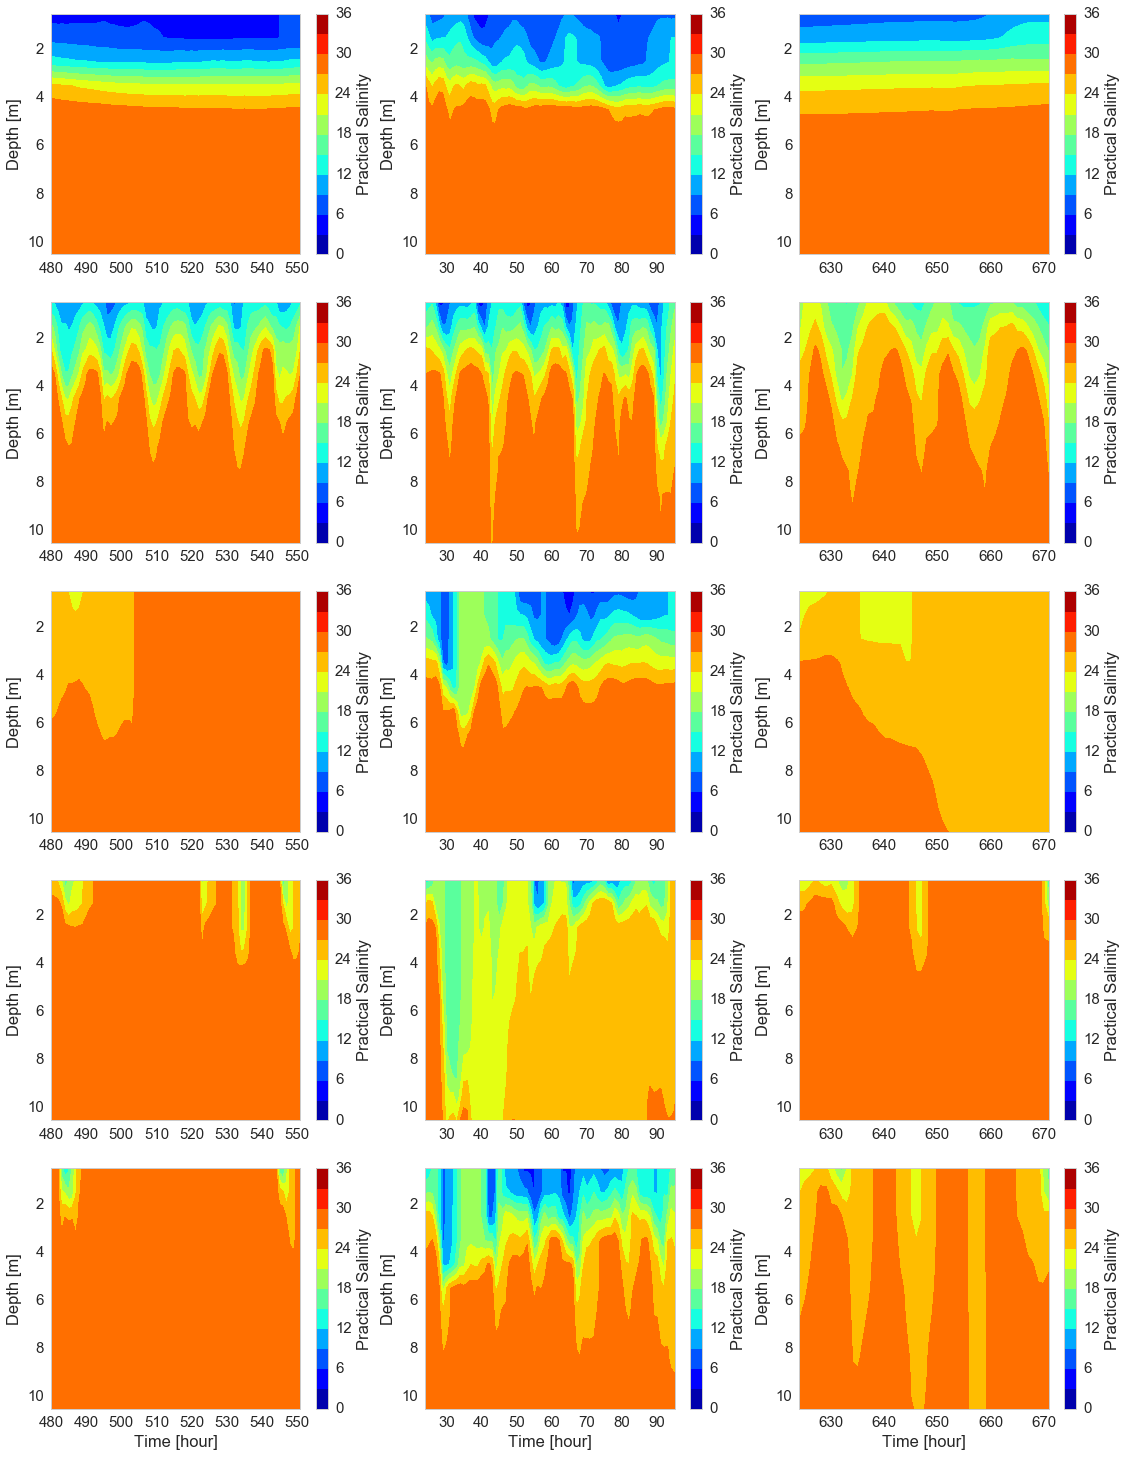

In [46]:
## strong wind
plot_stra_allflows('Sandheads',10,grid_T_oct,grid_T_may,grid_T_jan,480,551,24,95,624,671)

* zoom in last five days

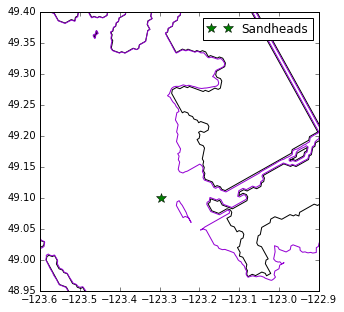

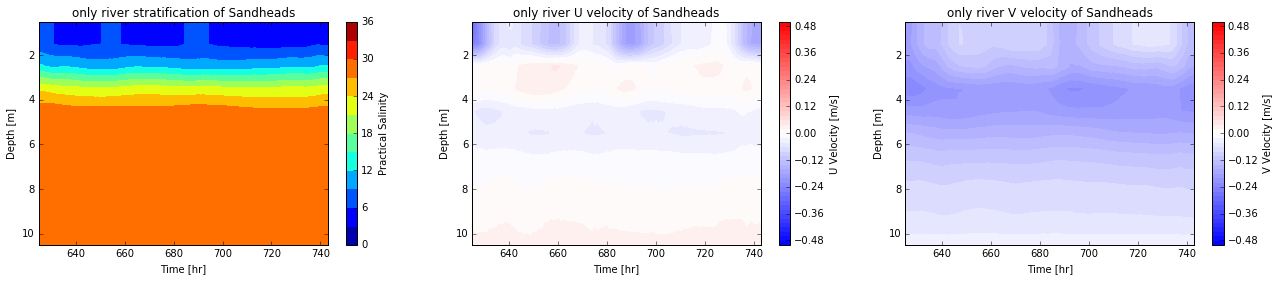

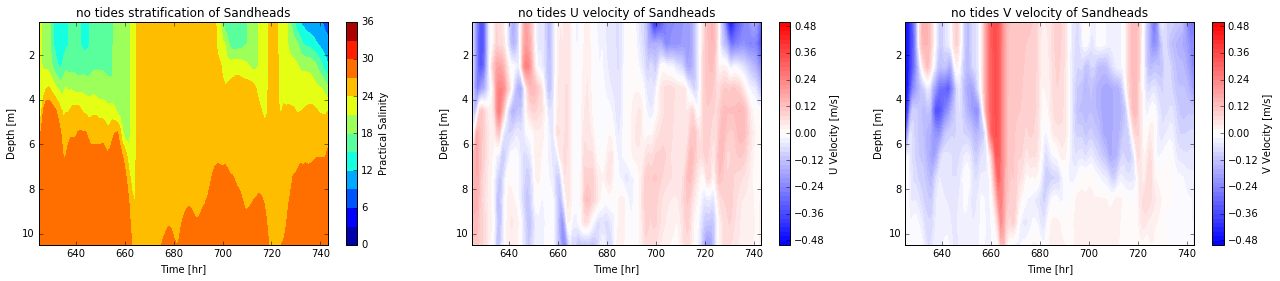

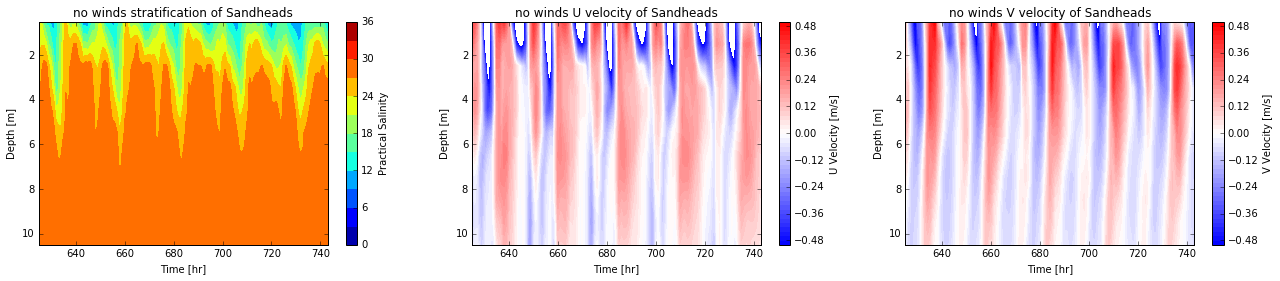

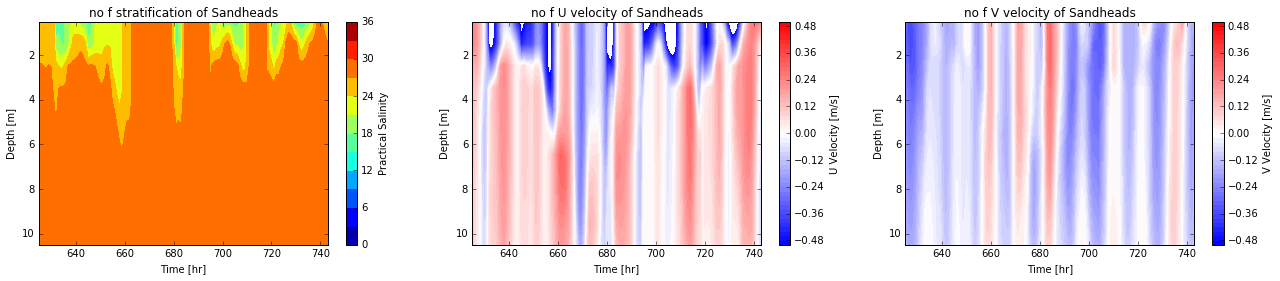

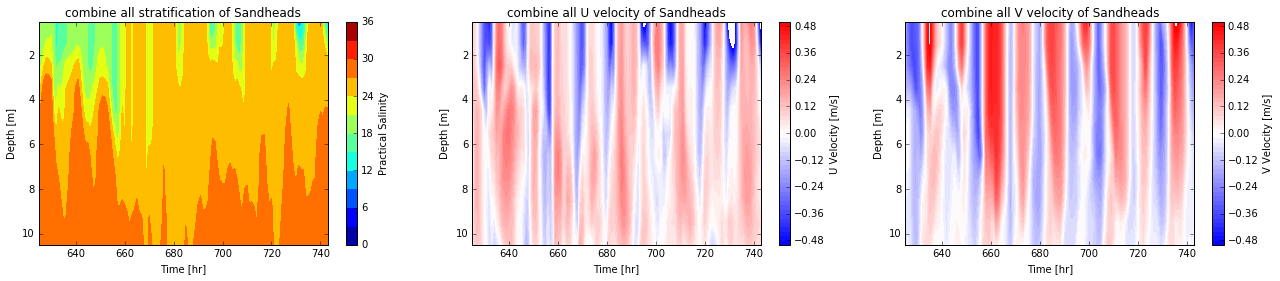

In [13]:
plot_stn('Sandheads')
fig = plot_stratification_current('Sandheads',10,'only river',river_T,river_U,river_V,625,743)
fig = plot_stratification_current('Sandheads',10,'no tides',notide_T,notide_U,notide_V,625,743)
fig = plot_stratification_current('Sandheads',10,'no winds',nowind_T,nowind_U,nowind_V,625,743)
fig = plot_stratification_current('Sandheads',10,'no f',nof_T,nof_U,nof_V,625,743)
fig = plot_stratification_current('Sandheads',10,'combine all',all_T,all_U,all_V,625,743)

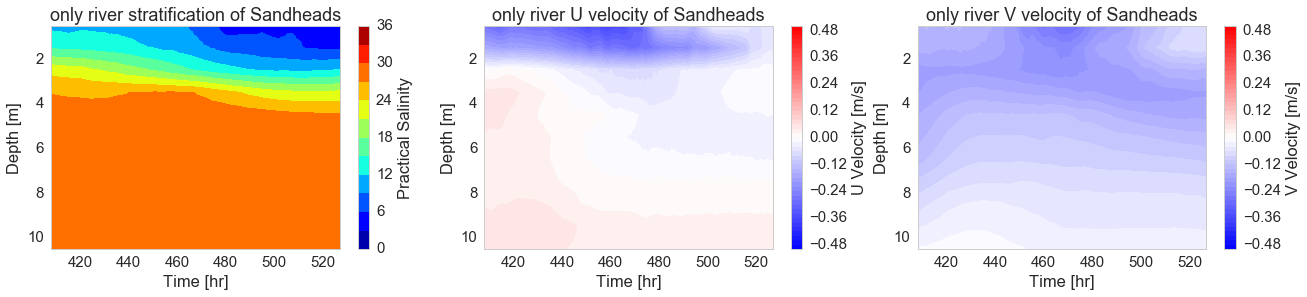

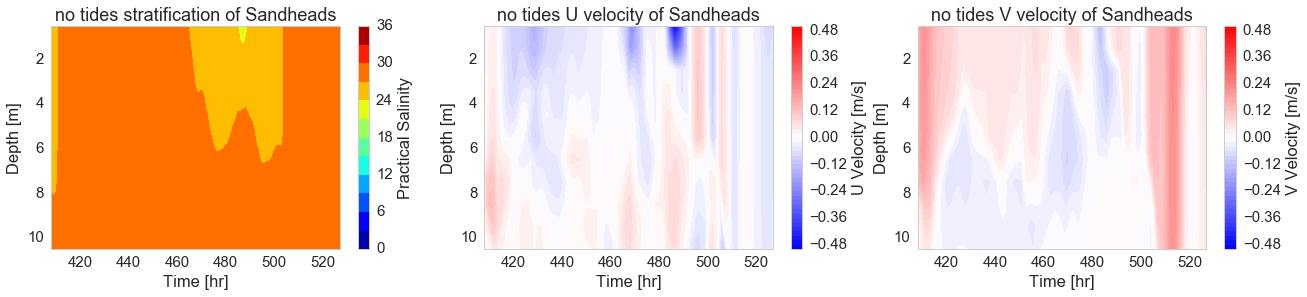

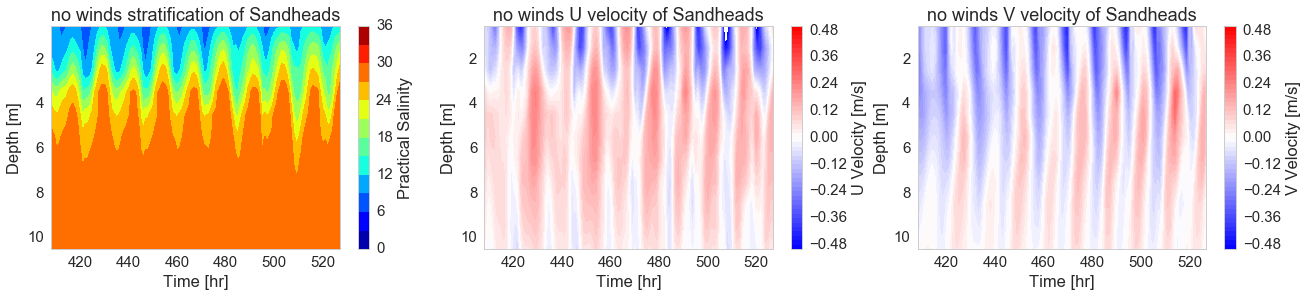

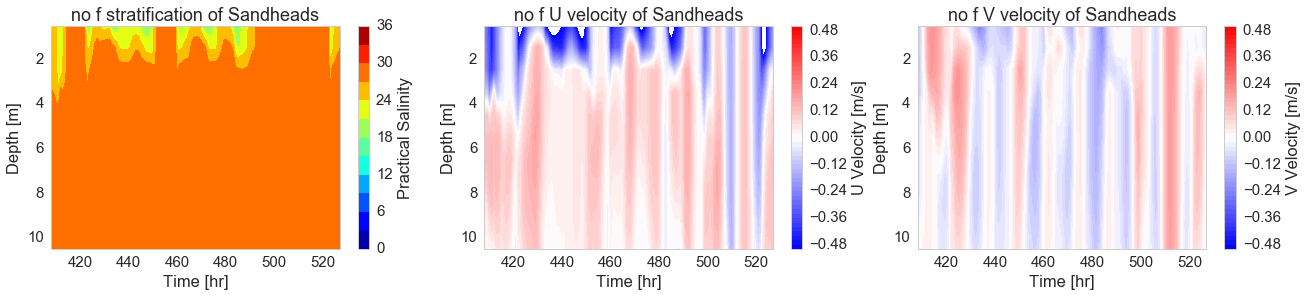

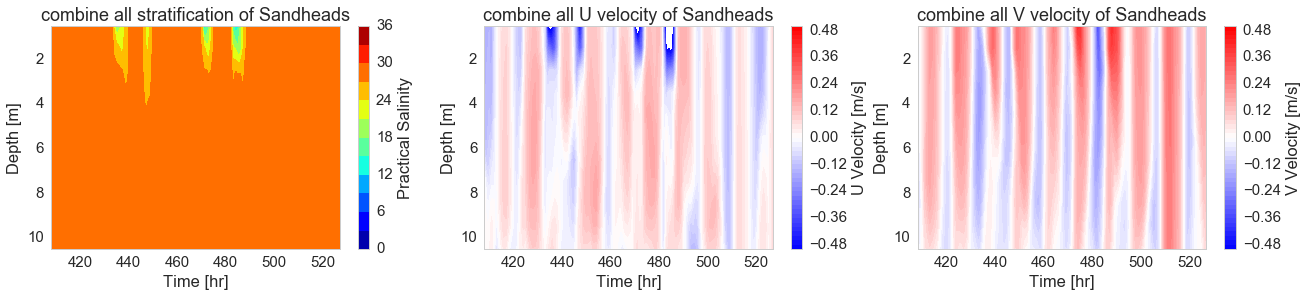

In [20]:
## check from Oct 17~22 during neap tides
fig = plot_stratification_current('Sandheads',10,'only river',river_T,river_U,river_V,408,527)
fig = plot_stratification_current('Sandheads',10,'no tides',notide_T,notide_U,notide_V,408,527)
fig = plot_stratification_current('Sandheads',10,'no winds',nowind_T,nowind_U,nowind_V,408,527)
fig = plot_stratification_current('Sandheads',10,'no f',nof_T,nof_U,nof_V,408,527)
fig = plot_stratification_current('Sandheads',10,'combine all',all_T,all_U,all_V,408,527)

* Steveston

* VENUS Central

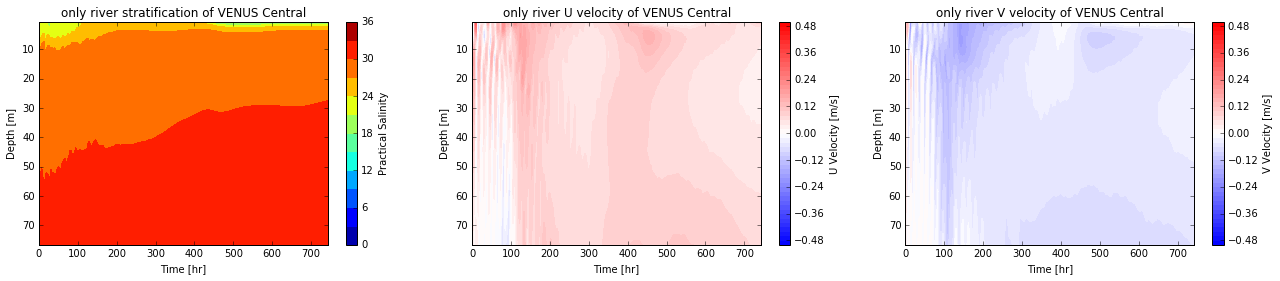

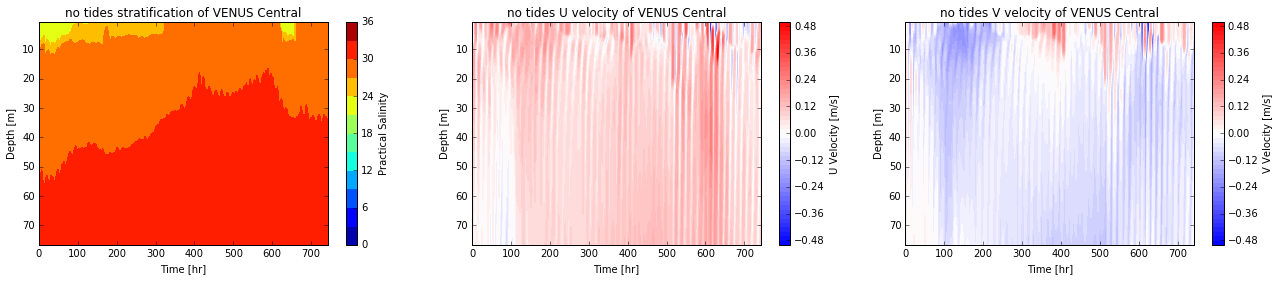

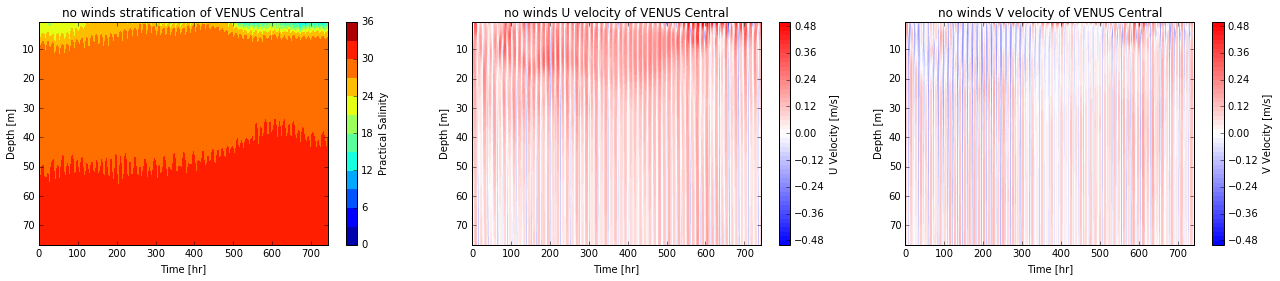

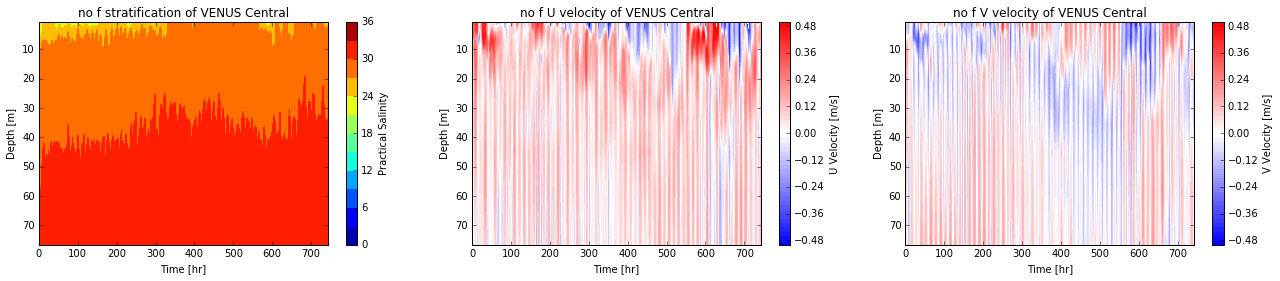

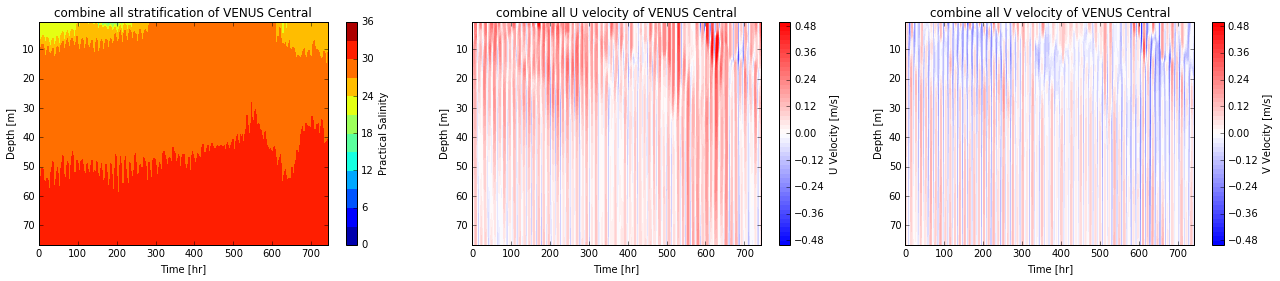

In [17]:
fig = plot_stratification_current('VENUS Central',25,'only river',river_T,river_U,river_V,0)
fig = plot_stratification_current('VENUS Central',25,'no tides',notide_T,notide_U,notide_V,0)
fig = plot_stratification_current('VENUS Central',25,'no winds',nowind_T,nowind_U,nowind_V,0)
fig = plot_stratification_current('VENUS Central',25,'no f',nof_T,nof_U,nof_V,0)
fig = plot_stratification_current('VENUS Central',25,'combine all',all_T,all_U,all_V,0)

* zoom in last five days

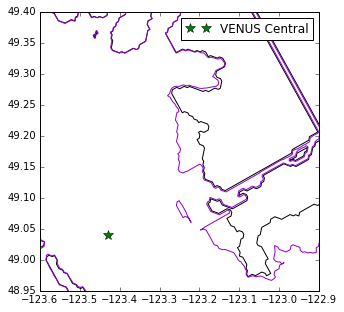

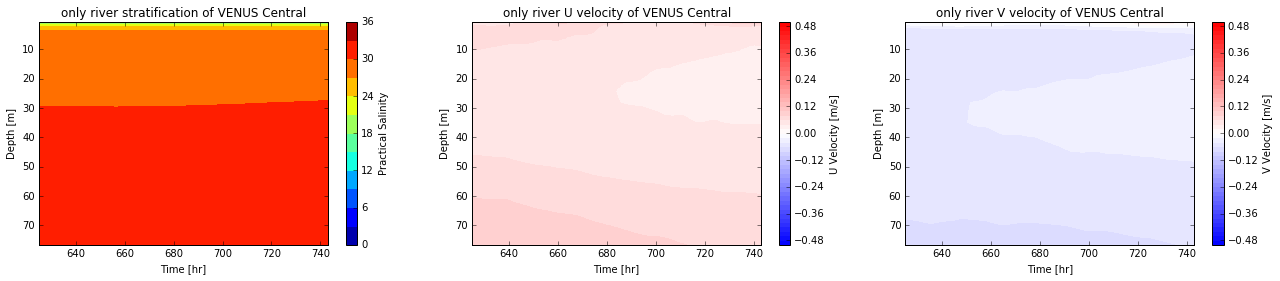

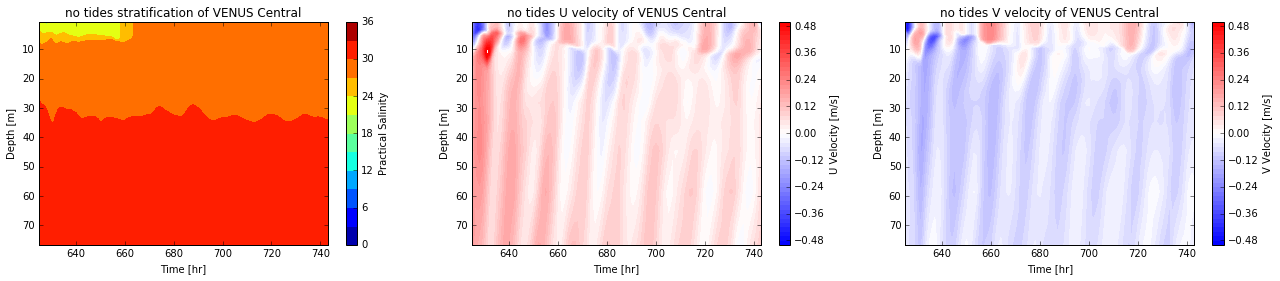

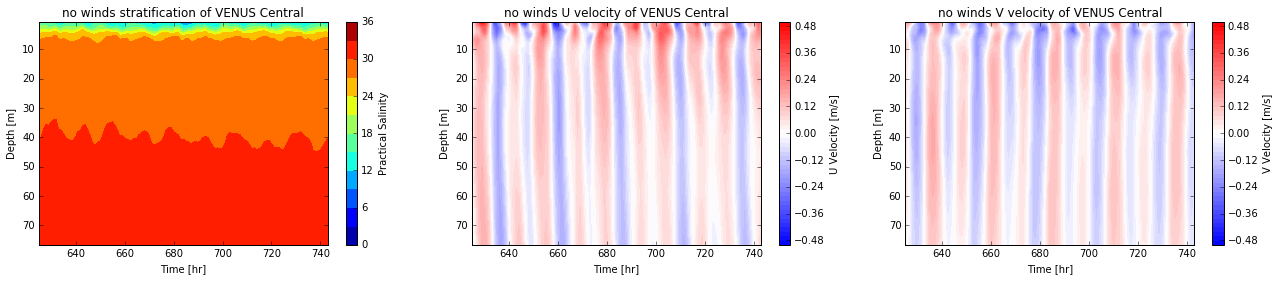

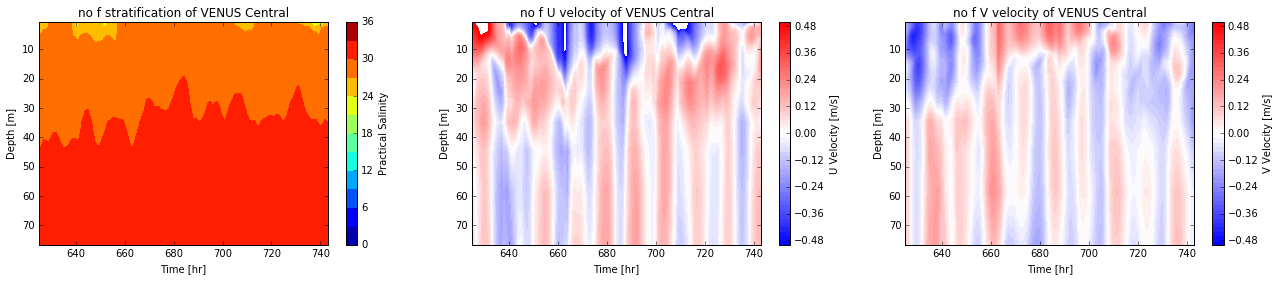

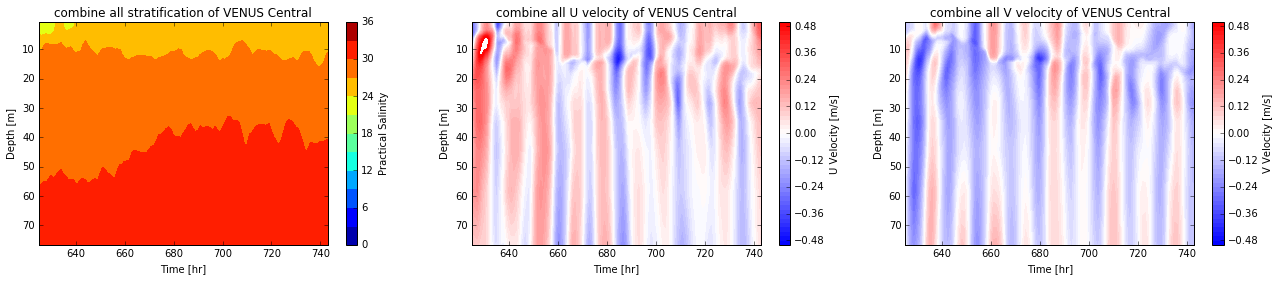

In [18]:
plot_stn('VENUS Central')
fig = plot_stratification_current('VENUS Central',25,'only river',river_T,river_U,river_V,625)
fig = plot_stratification_current('VENUS Central',25,'no tides',notide_T,notide_U,notide_V,625)
fig = plot_stratification_current('VENUS Central',25,'no winds',nowind_T,nowind_U,nowind_V,625)
fig = plot_stratification_current('VENUS Central',25,'no f',nof_T,nof_U,nof_V,625)
fig = plot_stratification_current('VENUS Central',25,'combine all',all_T,all_U,all_V,625)

# Final circulation pattern

In [23]:
def plot_spatial_circulation(grid_T,grid_U,grid_V,dep_ind,string,smin = 0,smax = 30,st=3):
    """This function was made to plot the circulation pattern of each case of 
    the final time"""
    fig, ax= plt.subplots(1,1,figsize=(6,6))
    S = grid_T.variables['vosaline'][-1,dep_ind,:,:]
    dep = grid_T.variables['deptht']
    lon = grid_T.variables['nav_lon']
    lat = grid_T.variables['nav_lat']
    U = grid_U.variables['vozocrtx']
    V = grid_V.variables['vomecrty']
    UU,VV = viz_tools.unstagger(U[-1,dep_ind,:,:],V[-1,dep_ind,:,:])
    #rotate
    theta = np.pi*29/180
    UU = UU*np.cos(theta) - VV*np.sin(theta)
    VV = UU*np.sin(theta) +VV*np.cos(theta)
    mesh=ax.pcolormesh(lon,lat,S[:],cmap='spectral')
    cbar = plt.colorbar(mesh, ax=ax)
    cbar.set_label('Practical Salinity')
    mesh.set_clim(vmin=smin, vmax=smax)
    #quivers
    lon = grid_T.variables['nav_lon'][:-1,:-1]
    lat = grid_T.variables['nav_lat'][:-1,:-1]
    quiver = ax.quiver(lon[::st,::st], lat[::st,::st], UU[::st,::st], VV[::st,::st],
                pivot='mid', width=0.003,scale=5, color='black',headwidth=2,headlength=2)
    ax.quiverkey(quiver,-123.1,49.2, 0.5, '0.5 m/s',
                 coordinates='data', color='black', labelcolor='black')
    #land
    viz_tools.plot_land_mask(ax,grid6,coords='map',color='burlywood')
    viz_tools.plot_coastline(ax, grid6, coords = 'map')
    viz_tools.plot_coastline(ax, grid6, coords = 'map', isobath = 5,color = 'DarkViolet')
    ax.set_xlim([-123.75,-122.8])
    ax.set_ylim([48.85,49.4])
    ax.set_title(string)
    return fig

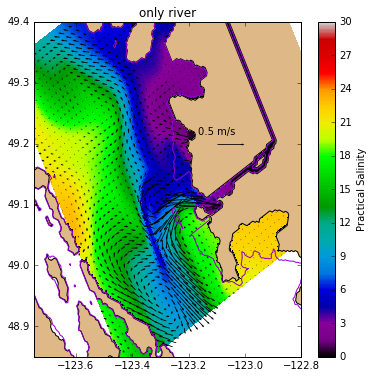

In [24]:
fig = plot_spatial_circulation(river_T,river_U,river_V,0,'only river')

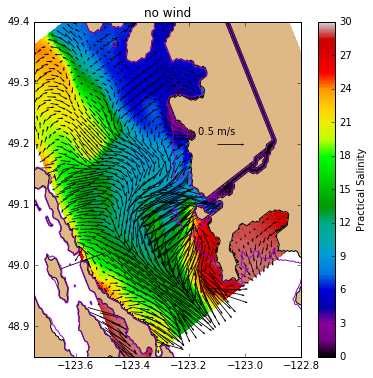

In [25]:
fig = plot_spatial_circulation(nowind_T,nowind_U,nowind_V,0,'no wind')

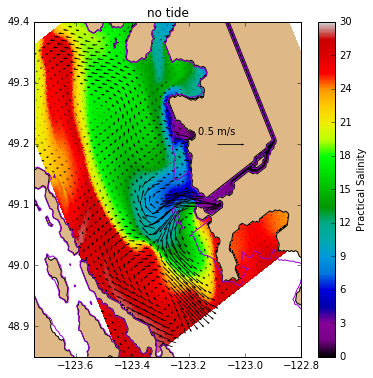

In [26]:
fig = plot_spatial_circulation(notide_T,notide_U,notide_V,0,'no tide')

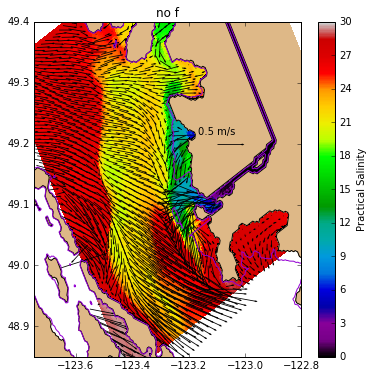

In [27]:
fig = plot_spatial_circulation(nof_T,nof_U,nof_V,0,'no f')

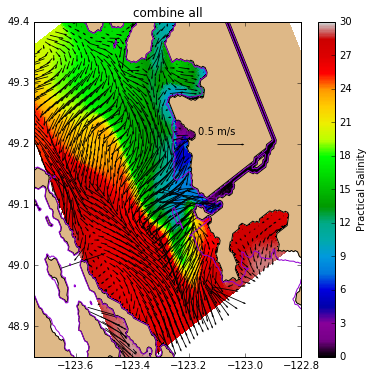

In [28]:
fig = plot_spatial_circulation(all_T,all_U,all_V,0,'combine all')